# PYTHON TASK: 
Based on the stated dataset, devise a minimum of 4 exploratory questions to be answered via association rule mining. Following that, devise a pipeline for preprocessing, mining, and knowledge evaluation, then implement the python codes for the process. Steps should include, but not limited to the following:  
1. Data Exploration (statistics and visualization) 
2. Data Preprocessing (cleaning, transformation) 
3. Data Mining (association rule mining) 
4. Knowledge evaluation (interestingness measure) 
Note:  
- You may create separate python notebooks for the tasks if necessary. 
- Please  include  a  reference  list  at  the  end  of  the  notebook(s)  of  any  tutorials,  GitHub  codes, websites, videos, etc. used for learning and reference to complete the tasks.

**INTRODUCTION:**
Association rule mining finds common patterns in data. Often used for market basket analysis to 
understand customer patterns, it is also possible to be applied on other types of datasets to find 
interesting associations and relationships between attributes. 

**OBJECTIVE:**
To perform association rule mining on higher education students’ data and find interesting 
associations.

# Problem Questions
**Exploring behavioural patterns of excelling students**
>In this context, the aim is to analyse the study habits, attendance habits, and external activities of students. Behavioural aspects can then be discerned whether they contribute significantly towards overall academic performances. Patterns that indicate success among students will shed light on effective strategies to optimise student performance.

**Does home-environment influence academic performance?**
>This question considers whether the background of a student has any influence on the academic performance outcome. It dives deeper into investigating whether a parents’ status, such as their occupation and marital status, makes a difference or if it is purely up to an individual to determine the fate of their academic outcome. The question also explores whether the educational background  of parents is  a deterrent towards better academic performance. From here, we are able to gain a nuanced understanding of  how home-related attributes shape academic success.

**What personal attributes affect a student's academic performance?**
>This question probes into a students’ current academic situation such as their current location, their salary if they possess a job, and their high school educational background. Other personal attributes such as their age and gender will also be taken into consideration to investigate how pivotal their role is towards a students’ academic performance. The  outcome of this is to possibly formulate ways to subside the negative effects and enhance the positive influence of those attributes.

In [227]:
# https://github.com/chaiwencw/Higher-Education-Students-Performance-Evaluation/blob/main/GPAPredictionUsingML(Asgn2).ipynb

In [228]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Mining (association rule mining) 

In [229]:
# styling the plot outputs

sns.set_palette("gist_earth")
sns.set_style('darkgrid')
colours_list = ["viridis", "rocket", 'mako']

In [230]:
df = pd.read_csv('data_clean.csv', keep_default_na=False)

df.head()

,STUDENT ID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,MIDTERM_PEOPLE,MIDTERM_TIME,CLASS_NOTES,CLASS_LISTENING,DISCUSSION,FLIP_CLASSROOM,CGPA_PREV,CGPA_EXPECTED,COURSE ID,GRADE
0,STUDENT1,22-25,Male,Other,50%,Yes,No,No,USD 135-200,Bus,...,Alone,Closest date to the exam,Always,Sometimes,Never,Useful,<2.00,<2.00,1,DD
1,STUDENT2,22-25,Male,Other,50%,Yes,No,No,USD 135-200,Bus,...,Alone,Closest date to the exam,Always,Sometimes,Always,Useful,2.00-2.49,2.50-2.99,1,DD
2,STUDENT3,22-25,Male,State,50%,No,No,No,USD 201-270,Other,...,Alone,Closest date to the exam,Sometimes,Sometimes,Never,Not useful,2.00-2.49,2.00-2.49,1,DD
3,STUDENT4,18-21,Female,Private,50%,Yes,No,Yes,USD 201-270,Bus,...,Alone,Regularly during the semester,Always,Sometimes,Sometimes,Not useful,2.50-2.99,2.00-2.49,1,DD
4,STUDENT5,22-25,Male,Private,50%,No,No,Yes,USD 271-340,Bus,...,With friends,Closest date to the exam,Sometimes,Sometimes,Sometimes,Not useful,2.00-2.49,2.00-2.49,1,DD


In [231]:
# # 1-10 of the data are the personal questions, 11-16. questions include family questions, and the remaining questions include education habits.
personal = ['STUDENT ID', 'AGE', 'GENDER', 'HS_TYPE', 'SCHOLARSHIP', 'WORK', 'ACTIVITY', 'PARTNER', 'SALARY', 'TRANSPORT', 'ACCOMODATION']
family = ['STUDENT ID', 'MOTHER_EDUCATION', 'FATHER_EDUCATION', 'SIBLINGS', 'PARENTAL_STATUS', 'MOTHER_JOB', 'FATHER_JOB']
edu_extra = ['STUDENT ID', 'STUDY_HOURS', 'READING_NONSCI', 'READING_SCI', 'ATTENDANCE_SEMINAR', 'IMPACT']
edu_habits = ['STUDENT ID', 'ATTENDANCE_CLASS', 'MIDTERM_PEOPLE', 'MIDTERM_TIME', 'CLASS_NOTES', 'CLASS_LISTENING', 'DISCUSSION', 'FLIP_CLASSROOM']
edu_info = ['STUDENT ID', 'CGPA_PREV', 'CGPA_EXPECTED', 'COURSE ID', 'GRADE']
edu_grades = ['STUDENT ID', 'CGPA_PREV', 'CGPA_EXPECTED', 'GRADE']

In [232]:
# # Exploring behavioural patterns of excelling students
# edu_attributes = edu_extra[1:] + edu_habits[1:] + edu_grades[1:]
# # Does home-environment influence academic performance?
# home_attributes = family[1:] + edu_grades[1:]
# # What personal attributes affect a student's academic performance?
# personal_attributes = personal[1:] + edu_grades[1:]

In [233]:
df['CGPA_EXPECTED'].unique()

array(['<2.00', '2.50-2.99', '2.00-2.49', '3.00-3.49'], dtype=object)

In [234]:
high_expected = df[df['CGPA_EXPECTED'] == 'Above 3.49']

display(high_expected.shape)
high_expected.head()

(0, 33)

,STUDENT ID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,MIDTERM_PEOPLE,MIDTERM_TIME,CLASS_NOTES,CLASS_LISTENING,DISCUSSION,FLIP_CLASSROOM,CGPA_PREV,CGPA_EXPECTED,COURSE ID,GRADE


## What's the highest CGPA expected?

## Using mlextend

In [235]:
import mlxtend.frequent_patterns as fp

### Behaviour Patterns of top students

In [236]:
CGPA_top = df[df['CGPA_PREV'] == 'Above 3.49']
GRADE_top  = df[df['GRADE'] == 'AA']

students_top_all = pd.concat([CGPA_top, GRADE_top]).drop_duplicates().reset_index(drop=True)
students_top = students_top_all[edu_extra + edu_habits[1:] + edu_grades[1:]]
students_top.drop(columns=['FLIP_CLASSROOM'], inplace=True)

display(students_top.shape)
students_top.head()

C:\Users\Anis\AppData\Local\Temp\ipykernel_24076\2762565722.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students_top.drop(columns=['FLIP_CLASSROOM'], inplace=True)


(40, 15)

,STUDENT ID,STUDY_HOURS,READING_NONSCI,READING_SCI,ATTENDANCE_SEMINAR,IMPACT,ATTENDANCE_CLASS,MIDTERM_PEOPLE,MIDTERM_TIME,CLASS_NOTES,CLASS_LISTENING,DISCUSSION,CGPA_PREV,CGPA_EXPECTED,GRADE
0,STUDENT29,<5 hours,Sometimes,Sometimes,Yes,Positive,Always,Alone,Closest date to the exam,Always,Sometimes,Always,Above 3.49,3.00-3.49,CC
1,STUDENT31,<5 hours,Sometimes,Sometimes,Yes,Positive,Always,With friends,Closest date to the exam,Sometimes,Always,Always,Above 3.49,3.00-3.49,BB
2,STUDENT38,<5 hours,Sometimes,Sometimes,Yes,Positive,Always,Alone,Closest date to the exam,Always,Sometimes,Always,Above 3.49,3.00-3.49,DD
3,STUDENT48,<5 hours,Sometimes,Sometimes,Yes,Positive,Sometimes,Alone,Closest date to the exam,Sometimes,Never,Always,Above 3.49,2.50-2.99,CC
4,STUDENT55,<5 hours,None,None,Yes,Positive,Always,Alone,Regularly during the semester,Always,Never,Always,Above 3.49,2.50-2.99,CC


In [237]:
GRADE_vals = students_top['GRADE'].unique().tolist()
CGPA_vals = students_top['CGPA_PREV'].unique().tolist()

academic_vals = GRADE_vals + CGPA_vals
academic_vals

['CC',
 'BB',
 'DD',
 'CB',
 'AA',
 'BA',
 'Above 3.49',
 '2.50-2.99',
 '3.00-3.49',
 '<2.00',
 '2.00-2.49']

In [238]:
students_top_encoded = pd.get_dummies(students_top, columns=students_top.columns)

In [239]:
fp_apriori = fp.apriori(students_top_encoded,min_support=0.3,use_colnames=True)
display(fp_apriori)

,support,itemsets
0,0.600,(STUDY_HOURS_<5 hours)
1,0.725,(READING_NONSCI_Sometimes)
2,0.750,(READING_SCI_Sometimes)
3,0.800,(ATTENDANCE_SEMINAR_Yes)
4,1.000,(IMPACT_Positive)
...,...,...
1016,0.300,"(ATTENDANCE_CLASS_Always, READING_SCI_Sometime..."
1017,0.300,"(ATTENDANCE_CLASS_Always, READING_SCI_Sometime..."
1018,0.300,"(ATTENDANCE_CLASS_Always, CGPA_PREV_Above 3.49..."
1019,0.300,"(ATTENDANCE_CLASS_Always, READING_SCI_Sometime..."


In [240]:
fp_fpgrowth = fp.fpgrowth(students_top_encoded, min_support=0.3, use_colnames=True)
display(fp_fpgrowth)

,support,itemsets
0,1.000,(IMPACT_Positive)
1,0.900,(ATTENDANCE_CLASS_Always)
2,0.800,(ATTENDANCE_SEMINAR_Yes)
3,0.750,(MIDTERM_TIME_Closest date to the exam)
4,0.750,(READING_SCI_Sometimes)
...,...,...
1016,0.300,"(ATTENDANCE_SEMINAR_Yes, READING_SCI_Sometimes..."
1017,0.325,"(MIDTERM_TIME_Closest date to the exam, GRADE_..."
1018,0.300,"(ATTENDANCE_CLASS_Always, MIDTERM_TIME_Closest..."
1019,0.300,"(ATTENDANCE_CLASS_Always, MIDTERM_TIME_Closest..."


In [241]:
association_rules = fp.association_rules(fp_apriori,metric='confidence', min_threshold=0.5,support_only=False)
display(association_rules)
display(len(association_rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(READING_NONSCI_Sometimes),(STUDY_HOURS_<5 hours),0.725,0.600,0.450,0.620690,1.034483,0.015000,1.054545,0.121212
1,(STUDY_HOURS_<5 hours),(READING_NONSCI_Sometimes),0.600,0.725,0.450,0.750000,1.034483,0.015000,1.100000,0.083333
2,(READING_SCI_Sometimes),(STUDY_HOURS_<5 hours),0.750,0.600,0.475,0.633333,1.055556,0.025000,1.090909,0.210526
3,(STUDY_HOURS_<5 hours),(READING_SCI_Sometimes),0.600,0.750,0.475,0.791667,1.055556,0.025000,1.200000,0.131579
4,(ATTENDANCE_SEMINAR_Yes),(STUDY_HOURS_<5 hours),0.800,0.600,0.500,0.625000,1.041667,0.020000,1.066667,0.200000
...,...,...,...,...,...,...,...,...,...,...
14189,"(ATTENDANCE_SEMINAR_Yes, CGPA_EXPECTED_3.00-3.49)","(ATTENDANCE_CLASS_Always, READING_SCI_Sometime...",0.500,0.450,0.300,0.600000,1.333333,0.075000,1.375000,0.500000
14190,"(MIDTERM_TIME_Closest date to the exam, MIDTER...","(ATTENDANCE_CLASS_Always, READING_SCI_Sometime...",0.575,0.425,0.300,0.521739,1.227621,0.055625,1.202273,0.436275
14191,"(ATTENDANCE_SEMINAR_Yes, MIDTERM_TIME_Closest ...","(ATTENDANCE_CLASS_Always, READING_SCI_Sometime...",0.600,0.325,0.300,0.500000,1.538462,0.105000,1.350000,0.875000
14192,"(ATTENDANCE_SEMINAR_Yes, MIDTERM_PEOPLE_Alone)","(ATTENDANCE_CLASS_Always, READING_SCI_Sometime...",0.600,0.350,0.300,0.500000,1.428571,0.090000,1.300000,0.750000


14194

In [242]:
topic = ' for Behaviour Patterns of Top Students'

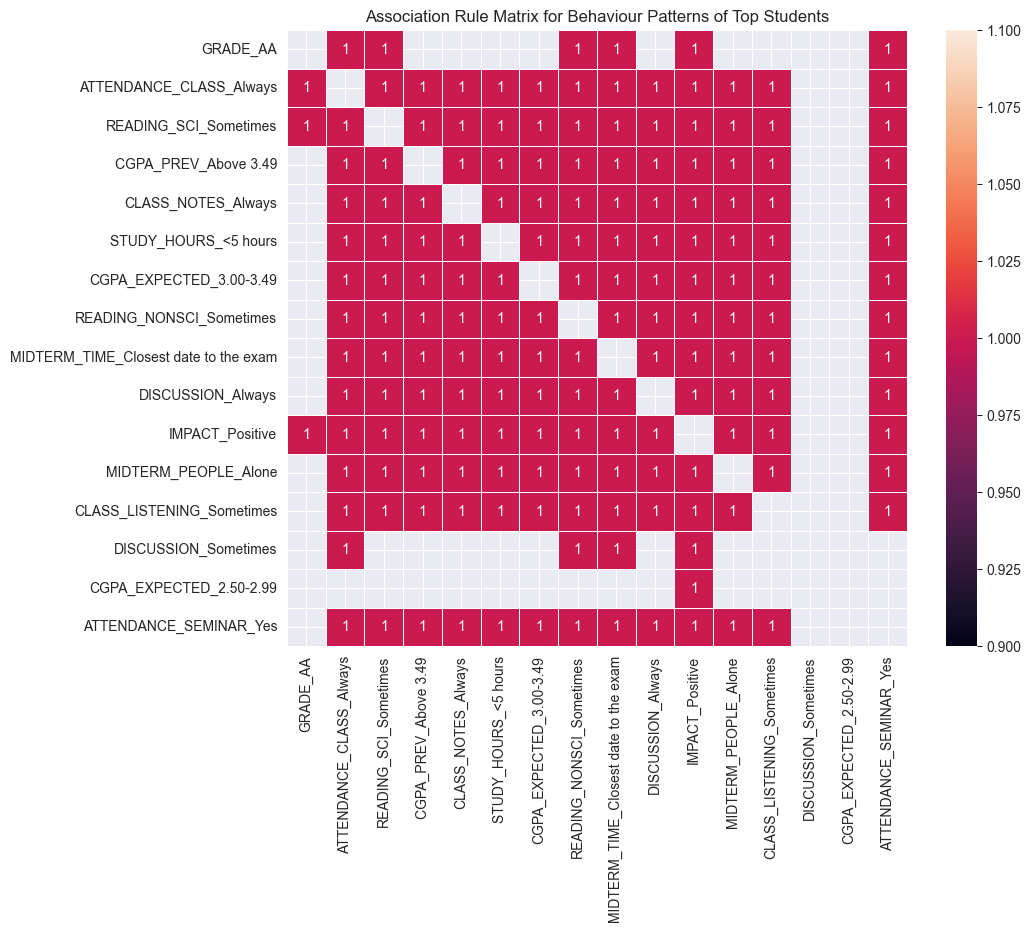

In [243]:
all_items = list(set(item for row in association_rules[['antecedents', 'consequents']].values.flatten() for item in row))

# Create a matrix with rows and columns representing items
association_matrix = pd.DataFrame(index=all_items, columns=all_items, dtype=int)

# Fill the matrix based on the presence of items in antecedents and consequents
for idx, row in association_rules.iterrows():
    association_matrix.loc[row['antecedents'], row['consequents']] = 1

plt.figure(figsize=(10, 8))
sns.heatmap(association_matrix, annot=True, linewidths=.5)
plt.title('Association Rule Matrix' + topic)
plt.show()

In [244]:
top_students_result = association_rules[association_rules['antecedents'].astype(str).str.contains('CGPA_EXPECTED') | association_rules['consequents'].astype(str).str.contains('CGPA_EXPECTED')]
# top_students_result = association_rules[association_rules['consequents'].astype(str).str.contains('CGPAS_EXPECTED')]
top_students_result_sorted = top_students_result.sort_values(by=['support', 'confidence'], ascending=False).reset_index(drop=True)
display(len(top_students_result_sorted))
top_students_result_sorted.head(20)

3854

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CGPA_EXPECTED_3.00-3.49),(IMPACT_Positive),0.55,1.00,0.55,1.000000,1.000000,0.0000,inf,0.000000
1,(CGPA_EXPECTED_3.00-3.49),(ATTENDANCE_CLASS_Always),0.55,0.90,0.55,1.000000,1.111111,0.0550,inf,0.222222
2,"(ATTENDANCE_CLASS_Always, CGPA_EXPECTED_3.00-3...",(IMPACT_Positive),0.55,1.00,0.55,1.000000,1.000000,0.0000,inf,0.000000
3,"(IMPACT_Positive, CGPA_EXPECTED_3.00-3.49)",(ATTENDANCE_CLASS_Always),0.55,0.90,0.55,1.000000,1.111111,0.0550,inf,0.222222
4,(CGPA_EXPECTED_3.00-3.49),"(ATTENDANCE_CLASS_Always, IMPACT_Positive)",0.55,0.90,0.55,1.000000,1.111111,0.0550,inf,0.222222
5,(ATTENDANCE_CLASS_Always),(CGPA_EXPECTED_3.00-3.49),0.90,0.55,0.55,0.611111,1.111111,0.0550,1.157143,1.000000
6,"(ATTENDANCE_CLASS_Always, IMPACT_Positive)",(CGPA_EXPECTED_3.00-3.49),0.90,0.55,0.55,0.611111,1.111111,0.0550,1.157143,1.000000
7,(ATTENDANCE_CLASS_Always),"(IMPACT_Positive, CGPA_EXPECTED_3.00-3.49)",0.90,0.55,0.55,0.611111,1.111111,0.0550,1.157143,1.000000
8,(IMPACT_Positive),(CGPA_EXPECTED_3.00-3.49),1.00,0.55,0.55,0.550000,1.000000,0.0000,1.000000,0.000000
9,(IMPACT_Positive),"(ATTENDANCE_CLASS_Always, CGPA_EXPECTED_3.00-3...",1.00,0.55,0.55,0.550000,1.000000,0.0000,1.000000,0.000000


In [245]:
# top_students_result_sorted_bot = top_students_result.sort_values(by=['support', 'confidence'], ascending=True).reset_index(drop=True)
# display(len(top_students_result_sorted_bot))
# top_students_result_sorted_bot.head(20)

antecedents_str
CGPA_EXPECTED_3.00-3.49                                              227
IMPACT_Positive, CGPA_EXPECTED_3.00-3.49                             113
ATTENDANCE_CLASS_Always, CGPA_EXPECTED_3.00-3.49                     113
ATTENDANCE_SEMINAR_Yes, CGPA_EXPECTED_3.00-3.49                       91
READING_SCI_Sometimes, CGPA_EXPECTED_3.00-3.49                        71
MIDTERM_TIME_Closest date to the exam, CGPA_EXPECTED_3.00-3.49        67
CGPA_PREV_Above 3.49, CGPA_EXPECTED_3.00-3.49                         63
ATTENDANCE_CLASS_Always, IMPACT_Positive, CGPA_EXPECTED_3.00-3.49     56
MIDTERM_PEOPLE_Alone, CGPA_EXPECTED_3.00-3.49                         51
READING_NONSCI_Sometimes, CGPA_EXPECTED_3.00-3.49                     51
Name: count, dtype: int64

consequents_str
CGPA_EXPECTED_3.00-3.49                             227
IMPACT_Positive                                     115
ATTENDANCE_CLASS_Always                             114
IMPACT_Positive, CGPA_EXPECTED_3.00-3.49            113
ATTENDANCE_CLASS_Always, CGPA_EXPECTED_3.00-3.49    113
ATTENDANCE_SEMINAR_Yes                               92
ATTENDANCE_SEMINAR_Yes, CGPA_EXPECTED_3.00-3.49      85
READING_SCI_Sometimes                                72
MIDTERM_TIME_Closest date to the exam                68
CGPA_PREV_Above 3.49                                 64
Name: count, dtype: int64

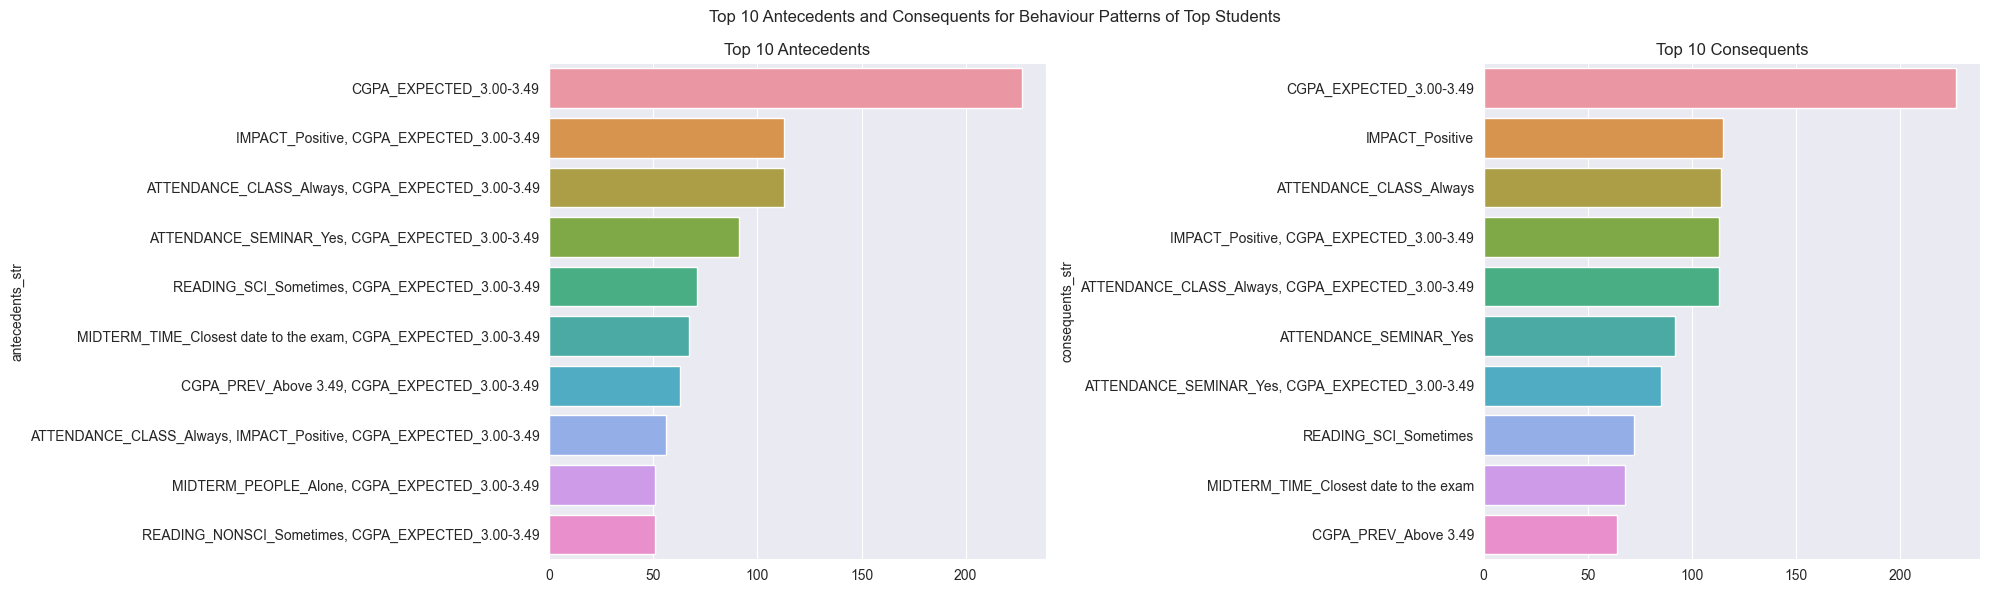

In [246]:
top_students_result_sorted['antecedents_str'] = top_students_result_sorted['antecedents'].apply(lambda x: ', '.join(map(str, x)))
top_students_result_sorted['consequents_str'] = top_students_result_sorted['consequents'].apply(lambda x: ', '.join(map(str, x)))

# Get the top 10 antecedents and consequents counts
top_antecedents_counts = top_students_result_sorted['antecedents_str'].value_counts().head(10)
top_consequents_counts = top_students_result_sorted['consequents_str'].value_counts().head(10)

# Plot bar charts for the top 10 antecedents and consequents using Seaborn
plt.figure(figsize=(20, 6))

# Top 10 Antecedents
plt.subplot(1, 2, 1)
sns.barplot(x=top_antecedents_counts.values, y=top_antecedents_counts.index)
plt.title('Top 10 Antecedents')

# Top 10 Consequents
plt.subplot(1, 2, 2)
sns.barplot(x=top_consequents_counts.values, y=top_consequents_counts.index)
plt.title('Top 10 Consequents')

plt.suptitle('Top 10 Antecedents and Consequents' + topic)

plt.tight_layout()

# Display the top 10 antecedents and consequents counts
display(top_antecedents_counts)
display(top_consequents_counts)

In [247]:
# Filter rules with one item in antecedents and consequents
single_item_rules = association_rules[
    association_rules.apply(lambda row: len(row['antecedents']) == 1 and len(row['consequents']) == 1, axis=1)
]

# single_item_rules = single_item_rules[single_item_rules['antecedents'].astype(str).str.contains('CGPA_EXPECTED') | single_item_rules['consequents'].astype(str).str.contains('CGPA_EXPECTED')]
single_item_rules = single_item_rules[single_item_rules['consequents'].astype(str).str.contains('CGPA_EXPECTED')]
single_item_rules_sorted = single_item_rules.sort_values(by=['support', 'confidence'], ascending=False).reset_index(drop=True)
display(len(single_item_rules_sorted))
single_item_rules_sorted.head(20)

12

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ATTENDANCE_CLASS_Always),(CGPA_EXPECTED_3.00-3.49),0.900,0.55,0.550,0.611111,1.111111,0.05500,1.157143,1.000000
1,(IMPACT_Positive),(CGPA_EXPECTED_3.00-3.49),1.000,0.55,0.550,0.550000,1.000000,0.00000,1.000000,0.000000
2,(ATTENDANCE_SEMINAR_Yes),(CGPA_EXPECTED_3.00-3.49),0.800,0.55,0.500,0.625000,1.136364,0.06000,1.200000,0.600000
3,(READING_NONSCI_Sometimes),(CGPA_EXPECTED_3.00-3.49),0.725,0.55,0.450,0.620690,1.128527,0.05125,1.186364,0.414141
4,(READING_SCI_Sometimes),(CGPA_EXPECTED_3.00-3.49),0.750,0.55,0.450,0.600000,1.090909,0.03750,1.125000,0.333333
5,(CGPA_PREV_Above 3.49),(CGPA_EXPECTED_3.00-3.49),0.625,0.55,0.425,0.680000,1.236364,0.08125,1.406250,0.509804
6,(MIDTERM_TIME_Closest date to the exam),(CGPA_EXPECTED_3.00-3.49),0.750,0.55,0.425,0.566667,1.030303,0.01250,1.038462,0.117647
7,(DISCUSSION_Always),(CGPA_EXPECTED_3.00-3.49),0.650,0.55,0.375,0.576923,1.048951,0.01750,1.063636,0.133333
8,(CLASS_NOTES_Always),(CGPA_EXPECTED_3.00-3.49),0.700,0.55,0.375,0.535714,0.974026,-0.01000,0.969231,-0.081633
9,(MIDTERM_PEOPLE_Alone),(CGPA_EXPECTED_3.00-3.49),0.725,0.55,0.375,0.517241,0.940439,-0.02375,0.932143,-0.187192


### Home-environment

In [248]:
df['CGPA_PREV'].unique()

array(['<2.00', '2.00-2.49', '2.50-2.99', '3.00-3.49', 'Above 3.49'],
      dtype=object)

In [249]:
df['GRADE'].unique()

array(['DD', 'DC', 'BB', 'Fail', 'CC', 'CB', 'AA', 'BA'], dtype=object)

In [250]:
CGPA_bot = df[df['CGPA_PREV'] == '<2.00']
GRADE_bot = df[df['GRADE'] == 'Fail']

students_bot_all = pd.concat([CGPA_bot, GRADE_bot]).drop_duplicates().reset_index(drop=True)

display(len(students_bot_all))
students_bot_all.head()

21

,STUDENT ID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,MIDTERM_PEOPLE,MIDTERM_TIME,CLASS_NOTES,CLASS_LISTENING,DISCUSSION,FLIP_CLASSROOM,CGPA_PREV,CGPA_EXPECTED,COURSE ID,GRADE
0,STUDENT1,22-25,Male,Other,50%,Yes,No,No,USD 135-200,Bus,...,Alone,Closest date to the exam,Always,Sometimes,Never,Useful,<2.00,<2.00,1,DD
1,STUDENT8,18-21,Female,State,50%,Yes,Yes,Yes,USD 201-270,Private Car/Taxi,...,Not applicable,Closest date to the exam,Always,Sometimes,Sometimes,Not useful,<2.00,<2.00,1,DC
2,STUDENT10,22-25,Female,State,50%,No,No,Yes,USD 271-340,Other,...,Alone,Closest date to the exam,Sometimes,Sometimes,Sometimes,Useful,<2.00,2.00-2.49,1,Fail
3,STUDENT11,18-21,Female,Private,50%,No,No,No,USD 271-340,Private Car/Taxi,...,Alone,Closest date to the exam,Sometimes,Sometimes,Sometimes,Useful,<2.00,<2.00,1,DC
4,STUDENT26,22-25,Male,State,50%,No,No,Yes,USD 135-200,Bus,...,Alone,Closest date to the exam,Sometimes,Never,Always,Useful,<2.00,2.00-2.49,1,CC


In [251]:
home_vals = list(set(family + edu_info))
students_home = students_top_all[home_vals]
students_home = students_home.drop(columns='STUDENT ID')
display(students_home.shape)
students_home

(40, 10)

,GRADE,COURSE ID,CGPA_PREV,PARENTAL_STATUS,FATHER_EDUCATION,MOTHER_EDUCATION,CGPA_EXPECTED,SIBLINGS,FATHER_JOB,MOTHER_JOB
0,CC,1,Above 3.49,Married,Secondary school,Secondary school,3.00-3.49,4,Retired,Housewife
1,BB,1,Above 3.49,Married,Primary school,Primary school,3.00-3.49,5 or above,Self-employment,Housewife
2,DD,1,Above 3.49,Married,High school,High school,3.00-3.49,1,Private sector employee,Housewife
3,CC,1,Above 3.49,Married,High school,University,2.50-2.99,1,Self-employment,Self-employment
4,CC,1,Above 3.49,Married,University,Primary school,2.50-2.99,2,Government officer,Private sector employee
5,CC,1,Above 3.49,Died - one of them or both,Primary school,Primary school,3.00-3.49,5 or above,Retired,Housewife
6,BB,1,Above 3.49,Married,High school,Primary school,3.00-3.49,5 or above,Self-employment,Housewife
7,CB,1,Above 3.49,Married,Secondary school,University,3.00-3.49,3,Private sector employee,Government officer
8,CC,1,Above 3.49,Divorced,High school,Primary school,3.00-3.49,5 or above,Retired,Housewife
9,CC,1,Above 3.49,Married,High school,Secondary school,3.00-3.49,2,Self-employment,Housewife


In [252]:
home_vals = list(set(family + edu_info))
students_bot_home = students_bot_all[home_vals]
students_bot_home = students_bot_home.drop(columns='STUDENT ID')
display(students_bot_home.shape)
students_bot_home

(21, 10)

,GRADE,COURSE ID,CGPA_PREV,PARENTAL_STATUS,FATHER_EDUCATION,MOTHER_EDUCATION,CGPA_EXPECTED,SIBLINGS,FATHER_JOB,MOTHER_JOB
0,DD,1,<2.00,Married,Secondary school,Primary school,<2.00,3,Other,Housewife
1,DC,1,<2.00,Married,High school,University,<2.00,1,Private sector employee,Private sector employee
2,Fail,1,<2.00,Married,Secondary school,Primary school,2.00-2.49,3,Private sector employee,Housewife
3,DC,1,<2.00,Married,University,High school,<2.00,2,Government officer,Government officer
4,CC,1,<2.00,Married,University,Primary school,2.00-2.49,3,Self-employment,Housewife
5,DD,1,<2.00,Married,Secondary school,Primary school,<2.00,5 or above,Private sector employee,Housewife
6,AA,4,<2.00,Married,MSc.,Ph.D.,<2.00,2,Government officer,Private sector employee
7,AA,5,<2.00,Married,University,University,2.00-2.49,2,Government officer,Retired
8,BA,6,<2.00,Married,University,High school,<2.00,2,Retired,Retired
9,CC,7,<2.00,Married,University,University,<2.00,1,Government officer,Government officer


#### Top students

In [253]:
students_home_encoded = pd.get_dummies(students_home, columns=students_home.columns)

In [254]:
fp_apriori = fp.apriori(students_home_encoded,min_support=0.3,use_colnames=True)
display(fp_apriori)

,support,itemsets
0,0.425,(GRADE_AA)
1,0.625,(CGPA_PREV_Above 3.49)
2,0.850,(PARENTAL_STATUS_Married)
3,0.300,(MOTHER_EDUCATION_Primary school)
4,0.325,(CGPA_EXPECTED_2.50-2.99)
5,0.550,(CGPA_EXPECTED_3.00-3.49)
6,0.675,(MOTHER_JOB_Housewife)
7,0.325,"(PARENTAL_STATUS_Married, GRADE_AA)"
8,0.525,"(PARENTAL_STATUS_Married, CGPA_PREV_Above 3.49)"
9,0.425,"(CGPA_PREV_Above 3.49, CGPA_EXPECTED_3.00-3.49)"


In [255]:
fp_fpgrowth = fp.fpgrowth(students_home_encoded, min_support=0.3, use_colnames=True)
display(fp_fpgrowth)

,support,itemsets
0,0.850,(PARENTAL_STATUS_Married)
1,0.675,(MOTHER_JOB_Housewife)
2,0.625,(CGPA_PREV_Above 3.49)
3,0.550,(CGPA_EXPECTED_3.00-3.49)
4,0.300,(MOTHER_EDUCATION_Primary school)
5,0.325,(CGPA_EXPECTED_2.50-2.99)
6,0.425,(GRADE_AA)
7,0.575,"(PARENTAL_STATUS_Married, MOTHER_JOB_Housewife)"
8,0.525,"(PARENTAL_STATUS_Married, CGPA_PREV_Above 3.49)"
9,0.425,"(CGPA_PREV_Above 3.49, MOTHER_JOB_Housewife)"


In [256]:
association_rules = fp.association_rules(fp_apriori,metric='confidence', min_threshold=0.5,support_only=False)
display(len(association_rules))

34

In [257]:
topic = 'for Home Enviroment Factors of Top Students'

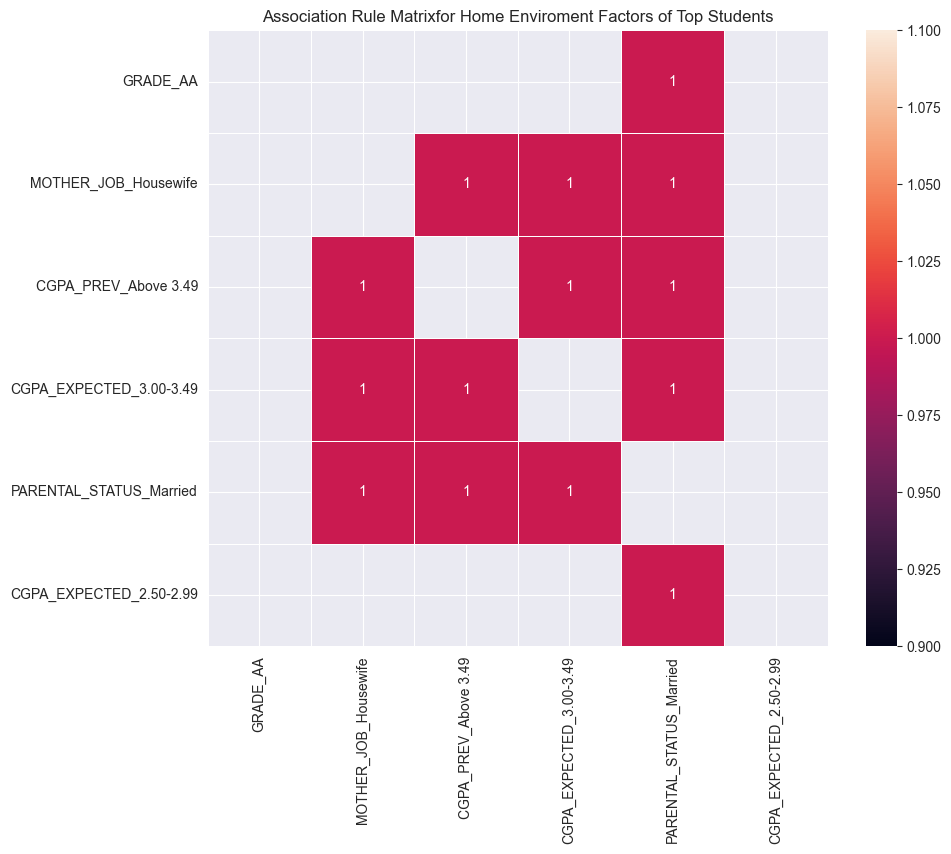

In [258]:
all_items = list(set(item for row in association_rules[['antecedents', 'consequents']].values.flatten() for item in row))

# Create a matrix with rows and columns representing items
association_matrix = pd.DataFrame(index=all_items, columns=all_items, dtype=int)

# Fill the matrix based on the presence of items in antecedents and consequents
for idx, row in association_rules.iterrows():
    association_matrix.loc[row['antecedents'], row['consequents']] = 1

plt.figure(figsize=(10, 8))
sns.heatmap(association_matrix, annot=True, linewidths=.5)
plt.title('Association Rule Matrix' + topic)
plt.show()

In [259]:
students_home_result = association_rules[association_rules['antecedents'].astype(str).str.contains('CGPA_EXPECTED') | association_rules['consequents'].astype(str).str.contains('CGPA_EXPECTED')]
students_home_result_sorted = students_home_result.sort_values(by=['support', 'confidence'], ascending=False).reset_index(drop=True)
display(len(students_home_result_sorted))
students_home_result_sorted.head(20)

22

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CGPA_EXPECTED_3.00-3.49),(MOTHER_JOB_Housewife),0.550,0.675,0.450,0.818182,1.212121,0.078750,1.787500,0.388889
1,(MOTHER_JOB_Housewife),(CGPA_EXPECTED_3.00-3.49),0.675,0.550,0.450,0.666667,1.212121,0.078750,1.350000,0.538462
2,(CGPA_EXPECTED_3.00-3.49),(CGPA_PREV_Above 3.49),0.550,0.625,0.425,0.772727,1.236364,0.081250,1.650000,0.424837
3,(CGPA_PREV_Above 3.49),(CGPA_EXPECTED_3.00-3.49),0.625,0.550,0.425,0.680000,1.236364,0.081250,1.406250,0.509804
4,(CGPA_EXPECTED_3.00-3.49),(PARENTAL_STATUS_Married),0.550,0.850,0.400,0.727273,0.855615,-0.067500,0.550000,-0.272727
5,"(PARENTAL_STATUS_Married, CGPA_EXPECTED_3.00-3...",(MOTHER_JOB_Housewife),0.400,0.675,0.350,0.875000,1.296296,0.080000,2.600000,0.380952
6,"(CGPA_PREV_Above 3.49, MOTHER_JOB_Housewife)",(CGPA_EXPECTED_3.00-3.49),0.425,0.550,0.350,0.823529,1.497326,0.116250,2.550000,0.577640
7,"(CGPA_PREV_Above 3.49, CGPA_EXPECTED_3.00-3.49)",(MOTHER_JOB_Housewife),0.425,0.675,0.350,0.823529,1.220044,0.063125,1.841667,0.313665
8,"(MOTHER_JOB_Housewife, CGPA_EXPECTED_3.00-3.49)",(CGPA_PREV_Above 3.49),0.450,0.625,0.350,0.777778,1.244444,0.068750,1.687500,0.357143
9,"(MOTHER_JOB_Housewife, CGPA_EXPECTED_3.00-3.49)",(PARENTAL_STATUS_Married),0.450,0.850,0.350,0.777778,0.915033,-0.032500,0.675000,-0.144444


antecedents_str
CGPA_EXPECTED_3.00-3.49                             6
MOTHER_JOB_Housewife                                3
CGPA_PREV_Above 3.49                                3
PARENTAL_STATUS_Married, CGPA_EXPECTED_3.00-3.49    2
CGPA_PREV_Above 3.49, CGPA_EXPECTED_3.00-3.49       2
MOTHER_JOB_Housewife, CGPA_EXPECTED_3.00-3.49       2
CGPA_PREV_Above 3.49, MOTHER_JOB_Housewife          1
PARENTAL_STATUS_Married, MOTHER_JOB_Housewife       1
CGPA_EXPECTED_2.50-2.99                             1
PARENTAL_STATUS_Married, CGPA_PREV_Above 3.49       1
Name: count, dtype: int64

consequents_str
CGPA_EXPECTED_3.00-3.49                             5
PARENTAL_STATUS_Married                             4
MOTHER_JOB_Housewife                                3
CGPA_PREV_Above 3.49                                3
PARENTAL_STATUS_Married, CGPA_EXPECTED_3.00-3.49    2
CGPA_PREV_Above 3.49, MOTHER_JOB_Housewife          1
PARENTAL_STATUS_Married, MOTHER_JOB_Housewife       1
MOTHER_JOB_Housewife, CGPA_EXPECTED_3.00-3.49       1
CGPA_PREV_Above 3.49, CGPA_EXPECTED_3.00-3.49       1
PARENTAL_STATUS_Married, CGPA_PREV_Above 3.49       1
Name: count, dtype: int64

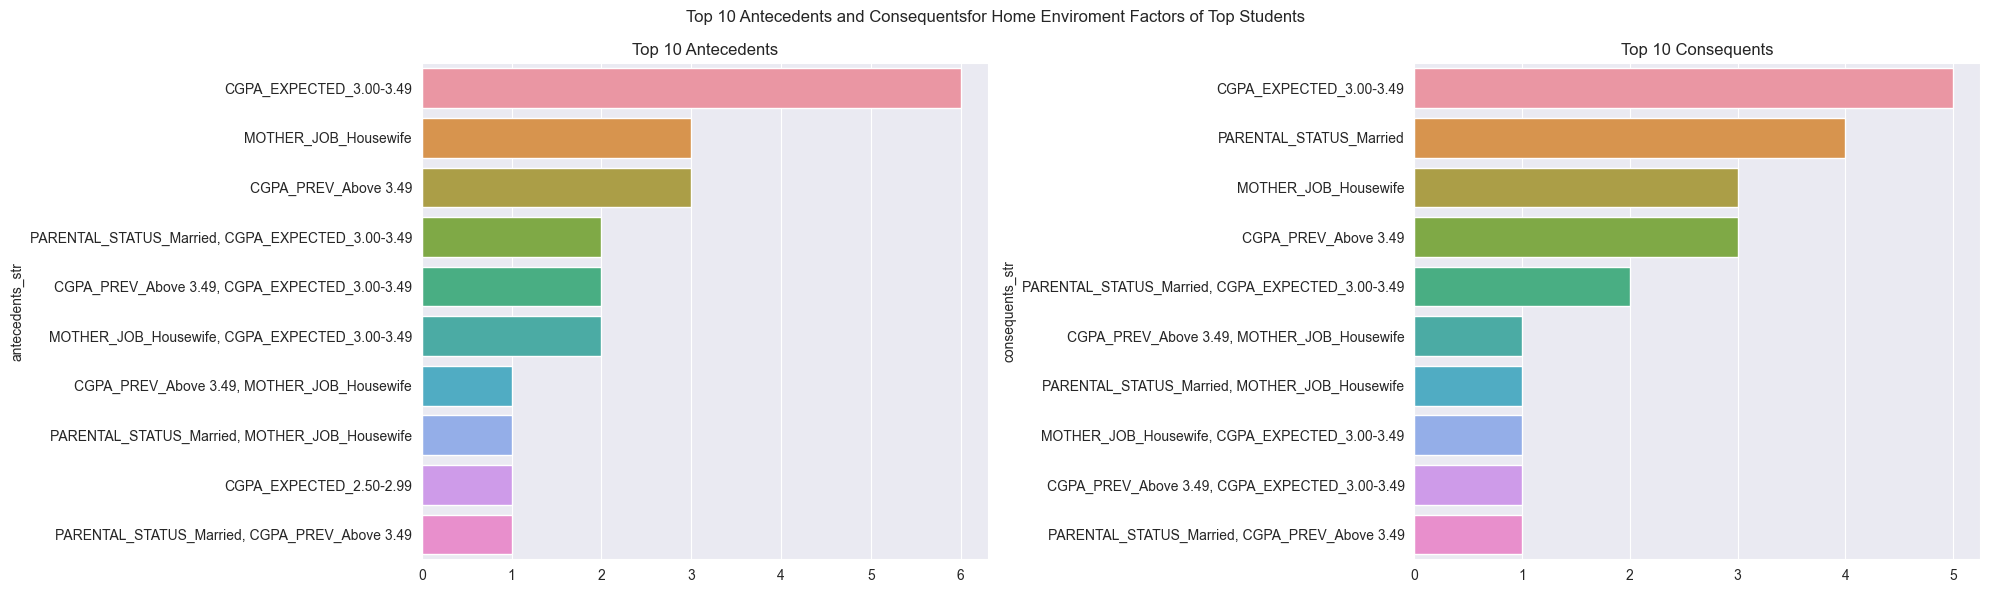

In [260]:
students_home_result_sorted['antecedents_str'] = students_home_result_sorted['antecedents'].apply(lambda x: ', '.join(map(str, x)))
students_home_result_sorted['consequents_str'] = students_home_result_sorted['consequents'].apply(lambda x: ', '.join(map(str, x)))

# Get the top 10 antecedents and consequents counts
top_antecedents_counts = students_home_result_sorted['antecedents_str'].value_counts().head(10)
top_consequents_counts = students_home_result_sorted['consequents_str'].value_counts().head(10)

# Plot bar charts for the top 10 antecedents and consequents using Seaborn
plt.figure(figsize=(20, 6))

# Top 10 Antecedents
plt.subplot(1, 2, 1)
sns.barplot(x=top_antecedents_counts.values, y=top_antecedents_counts.index)
plt.title('Top 10 Antecedents')

# Top 10 Consequents
plt.subplot(1, 2, 2)
sns.barplot(x=top_consequents_counts.values, y=top_consequents_counts.index)
plt.title('Top 10 Consequents')

plt.suptitle('Top 10 Antecedents and Consequents' + topic)

plt.tight_layout()

# Display the top 10 antecedents and consequents counts
display(top_antecedents_counts)
display(top_consequents_counts)

In [261]:
# Filter rules with one item in antecedents and consequents
single_item_rules = association_rules[
    association_rules.apply(lambda row: len(row['antecedents']) == 1 and len(row['consequents']) == 1, axis=1)
]

single_item_rules = single_item_rules[single_item_rules['consequents'].astype(str).str.contains('CGPA_EXPECTED')]
single_item_rules_sorted = single_item_rules.sort_values(by=['support', 'confidence'], ascending=False).reset_index(drop=True)
display(len(single_item_rules_sorted))
single_item_rules_sorted.head(20)

2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(MOTHER_JOB_Housewife),(CGPA_EXPECTED_3.00-3.49),0.675,0.55,0.450,0.666667,1.212121,0.07875,1.35000,0.538462
1,(CGPA_PREV_Above 3.49),(CGPA_EXPECTED_3.00-3.49),0.625,0.55,0.425,0.680000,1.236364,0.08125,1.40625,0.509804


In [262]:
personal_top_single = single_item_rules_sorted.copy()

#### Failing students

In [263]:
students_bot_home_encoded = pd.get_dummies(students_bot_home, columns=students_home.columns)

In [264]:
fp_apriori = fp.apriori(students_bot_home_encoded,min_support=0.3,use_colnames=True)
display(fp_apriori)

,support,itemsets
0,0.380952,(GRADE_Fail)
1,0.380952,(COURSE ID_1)
2,0.809524,(CGPA_PREV_<2.00)
3,0.857143,(PARENTAL_STATUS_Married)
4,0.333333,(FATHER_EDUCATION_University)
5,0.380952,(MOTHER_EDUCATION_High school)
6,0.333333,(MOTHER_EDUCATION_Primary school)
7,0.380952,(CGPA_EXPECTED_2.00-2.49)
8,0.476190,(CGPA_EXPECTED_<2.00)
9,0.333333,(SIBLINGS_1)


In [265]:
fp_fpgrowth = fp.fpgrowth(students_bot_home_encoded, min_support=0.3, use_colnames=True)
display(fp_fpgrowth)

,support,itemsets
0,0.857143,(PARENTAL_STATUS_Married)
1,0.809524,(CGPA_PREV_<2.00)
2,0.476190,(CGPA_EXPECTED_<2.00)
3,0.380952,(MOTHER_JOB_Housewife)
4,0.380952,(COURSE ID_1)
5,0.333333,(MOTHER_EDUCATION_Primary school)
6,0.333333,(SIBLINGS_1)
7,0.380952,(CGPA_EXPECTED_2.00-2.49)
8,0.380952,(GRADE_Fail)
9,0.380952,(FATHER_JOB_Government officer)


In [266]:
association_rules = fp.association_rules(fp_apriori,metric='confidence', min_threshold=0.5,support_only=False)
display(len(association_rules))

25

In [267]:
topic = 'for Home Enviroment Factors of Failing Students'

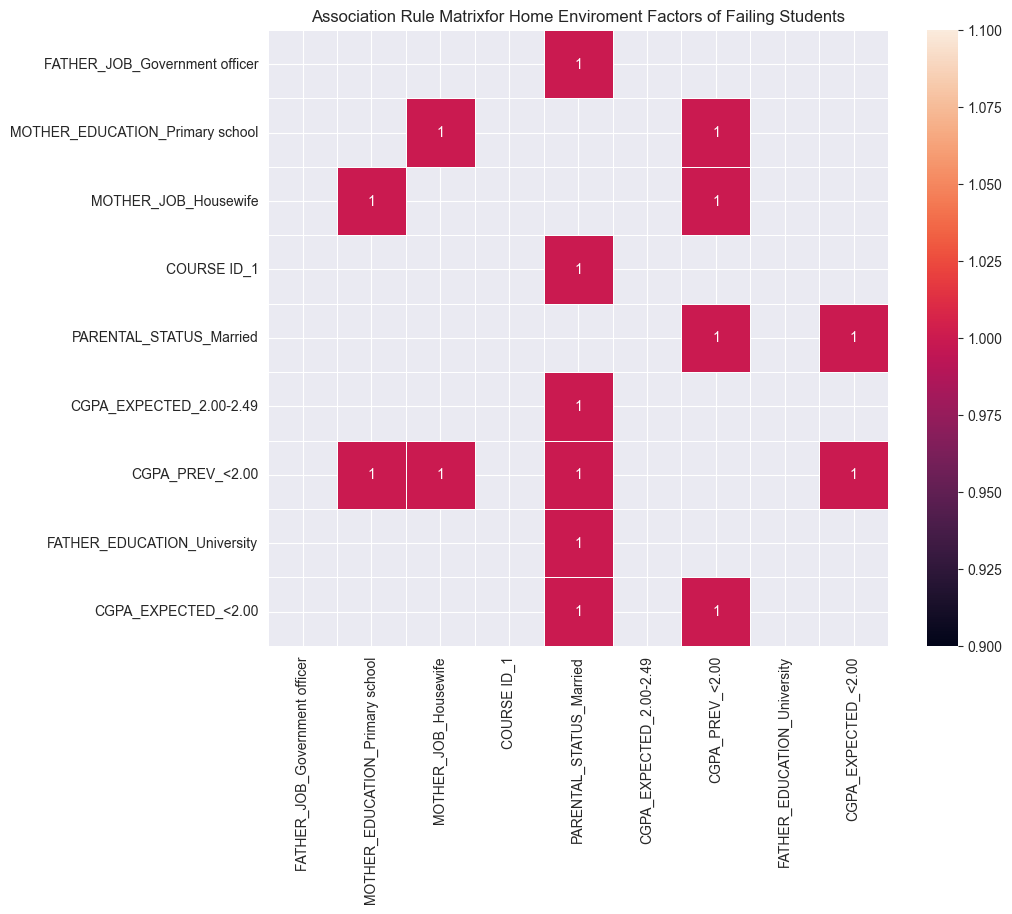

In [268]:
all_items = list(set(item for row in association_rules[['antecedents', 'consequents']].values.flatten() for item in row))

# Create a matrix with rows and columns representing items
association_matrix = pd.DataFrame(index=all_items, columns=all_items, dtype=int)

# Fill the matrix based on the presence of items in antecedents and consequents
for idx, row in association_rules.iterrows():
    association_matrix.loc[row['antecedents'], row['consequents']] = 1

plt.figure(figsize=(10, 8))
sns.heatmap(association_matrix, annot=True, linewidths=.5)
plt.title('Association Rule Matrix' + topic)
plt.show()

In [269]:
students_home_result = association_rules[association_rules['antecedents'].astype(str).str.contains('CGPA_EXPECTED') | association_rules['consequents'].astype(str).str.contains('CGPA_EXPECTED')]
students_home_result_sorted = students_home_result.sort_values(by=['support', 'confidence'], ascending=False).reset_index(drop=True)
display(len(students_home_result_sorted))
students_home_result_sorted.head(20)

11

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CGPA_EXPECTED_<2.00),(CGPA_PREV_<2.00),0.476190,0.809524,0.476190,1.000000,1.235294,0.090703,inf,0.363636
1,(CGPA_PREV_<2.00),(CGPA_EXPECTED_<2.00),0.809524,0.476190,0.476190,0.588235,1.235294,0.090703,1.272109,1.000000
2,"(PARENTAL_STATUS_Married, CGPA_EXPECTED_<2.00)",(CGPA_PREV_<2.00),0.428571,0.809524,0.428571,1.000000,1.235294,0.081633,inf,0.333333
3,(CGPA_EXPECTED_<2.00),(PARENTAL_STATUS_Married),0.476190,0.857143,0.428571,0.900000,1.050000,0.020408,1.428571,0.090909
4,"(CGPA_EXPECTED_<2.00, CGPA_PREV_<2.00)",(PARENTAL_STATUS_Married),0.476190,0.857143,0.428571,0.900000,1.050000,0.020408,1.428571,0.090909
5,(CGPA_EXPECTED_<2.00),"(PARENTAL_STATUS_Married, CGPA_PREV_<2.00)",0.476190,0.714286,0.428571,0.900000,1.260000,0.088435,2.857143,0.393939
6,"(PARENTAL_STATUS_Married, CGPA_PREV_<2.00)",(CGPA_EXPECTED_<2.00),0.714286,0.476190,0.428571,0.600000,1.260000,0.088435,1.309524,0.722222
7,(CGPA_PREV_<2.00),"(PARENTAL_STATUS_Married, CGPA_EXPECTED_<2.00)",0.809524,0.428571,0.428571,0.529412,1.235294,0.081633,1.214286,1.000000
8,(PARENTAL_STATUS_Married),(CGPA_EXPECTED_<2.00),0.857143,0.476190,0.428571,0.500000,1.050000,0.020408,1.047619,0.333333
9,(PARENTAL_STATUS_Married),"(CGPA_EXPECTED_<2.00, CGPA_PREV_<2.00)",0.857143,0.476190,0.428571,0.500000,1.050000,0.020408,1.047619,0.333333


In [270]:
# Filter rules with one item in antecedents and consequents
single_item_rules = association_rules[
    association_rules.apply(lambda row: len(row['antecedents']) == 1 and len(row['consequents']) == 1, axis=1)
]

single_item_rules = single_item_rules[single_item_rules['antecedents'].astype(str).str.contains('CGPA_EXPECTED') | single_item_rules['consequents'].astype(str).str.contains('CGPA_EXPECTED')]
single_item_rules_sorted = single_item_rules.sort_values(by=['support', 'confidence'], ascending=False).reset_index(drop=True)
display(len(single_item_rules_sorted))
single_item_rules_sorted.head(20)

5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CGPA_EXPECTED_<2.00),(CGPA_PREV_<2.00),0.476190,0.809524,0.476190,1.000000,1.235294,0.090703,inf,0.363636
1,(CGPA_PREV_<2.00),(CGPA_EXPECTED_<2.00),0.809524,0.476190,0.476190,0.588235,1.235294,0.090703,1.272109,1.000000
2,(CGPA_EXPECTED_<2.00),(PARENTAL_STATUS_Married),0.476190,0.857143,0.428571,0.900000,1.050000,0.020408,1.428571,0.090909
3,(PARENTAL_STATUS_Married),(CGPA_EXPECTED_<2.00),0.857143,0.476190,0.428571,0.500000,1.050000,0.020408,1.047619,0.333333
4,(CGPA_EXPECTED_2.00-2.49),(PARENTAL_STATUS_Married),0.380952,0.857143,0.333333,0.875000,1.020833,0.006803,1.142857,0.032967


antecedents_str
CGPA_EXPECTED_<2.00                             3
CGPA_PREV_<2.00                                 2
PARENTAL_STATUS_Married                         2
PARENTAL_STATUS_Married, CGPA_EXPECTED_<2.00    1
CGPA_EXPECTED_<2.00, CGPA_PREV_<2.00            1
PARENTAL_STATUS_Married, CGPA_PREV_<2.00        1
CGPA_EXPECTED_2.00-2.49                         1
Name: count, dtype: int64

consequents_str
CGPA_EXPECTED_<2.00                             3
PARENTAL_STATUS_Married                         3
CGPA_PREV_<2.00                                 2
PARENTAL_STATUS_Married, CGPA_PREV_<2.00        1
PARENTAL_STATUS_Married, CGPA_EXPECTED_<2.00    1
CGPA_EXPECTED_<2.00, CGPA_PREV_<2.00            1
Name: count, dtype: int64

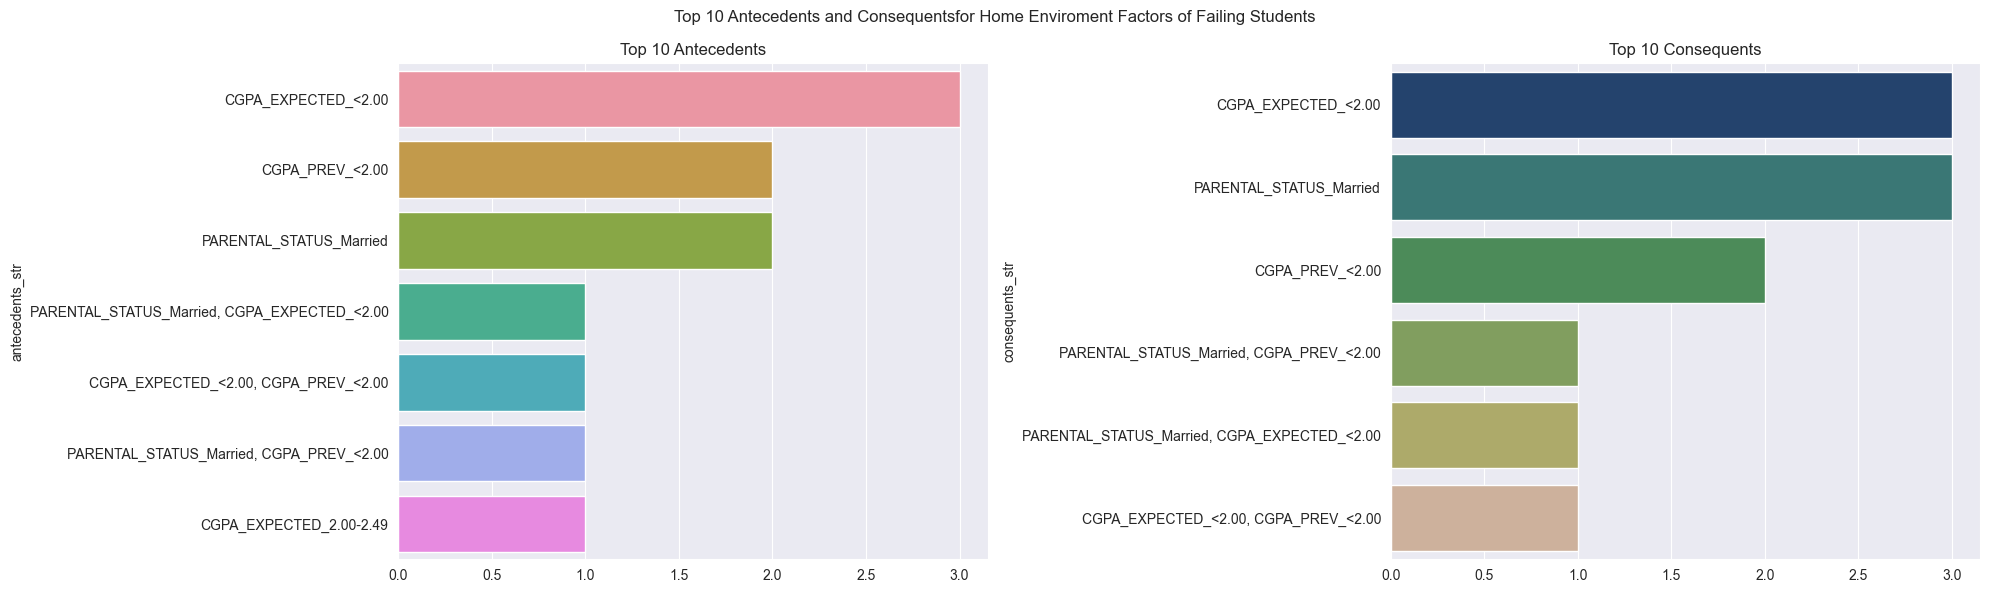

In [271]:
students_home_result_sorted['antecedents_str'] = students_home_result_sorted['antecedents'].apply(lambda x: ', '.join(map(str, x)))
students_home_result_sorted['consequents_str'] = students_home_result_sorted['consequents'].apply(lambda x: ', '.join(map(str, x)))

# Get the top 10 antecedents and consequents counts
top_antecedents_counts = students_home_result_sorted['antecedents_str'].value_counts().head(10)
top_consequents_counts = students_home_result_sorted['consequents_str'].value_counts().head(10)

# Plot bar charts for the top 10 antecedents and consequents using Seaborn
plt.figure(figsize=(20, 6))

# Top 10 Antecedents
plt.subplot(1, 2, 1)
sns.barplot(x=top_antecedents_counts.values, y=top_antecedents_counts.index)
plt.title('Top 10 Antecedents')

# Top 10 Consequents
plt.subplot(1, 2, 2)
sns.barplot(x=top_consequents_counts.values, y=top_consequents_counts.index)
plt.title('Top 10 Consequents')

plt.suptitle('Top 10 Antecedents and Consequents' + topic)

plt.tight_layout()

# Display the top 10 antecedents and consequents counts
display(top_antecedents_counts)
display(top_consequents_counts)

In [272]:
# Filter rules with one item in antecedents and consequents
single_item_rules = association_rules[
    association_rules.apply(lambda row: len(row['antecedents']) == 1 and len(row['consequents']) == 1, axis=1)
]

single_item_rules = single_item_rules[single_item_rules['consequents'].astype(str).str.contains('CGPA_EXPECTED')]
single_item_rules_sorted = single_item_rules.sort_values(by=['support', 'confidence'], ascending=False).reset_index(drop=True)
display(len(single_item_rules_sorted))
single_item_rules_sorted.head(20)

2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CGPA_PREV_<2.00),(CGPA_EXPECTED_<2.00),0.809524,0.47619,0.476190,0.588235,1.235294,0.090703,1.272109,1.000000
1,(PARENTAL_STATUS_Married),(CGPA_EXPECTED_<2.00),0.857143,0.47619,0.428571,0.500000,1.050000,0.020408,1.047619,0.333333


In [273]:
personal_bot_single = single_item_rules_sorted.copy()

##### Comparision

In [274]:
top_antecedents_set = set(item for sublist in personal_top_single['antecedents'] for item in sublist)
bot_antecedents_set = set(item for sublist in personal_bot_single['antecedents'] for item in sublist)

# Find the intersection of antecedents
intersection_antecedents = top_antecedents_set.intersection(bot_antecedents_set)

filtered_top_single = personal_top_single[personal_top_single['antecedents'].apply(lambda x: any(item in intersection_antecedents for item in x))]
filtered_bot_single = personal_bot_single[personal_bot_single['antecedents'].apply(lambda x: any(item in intersection_antecedents for item in x))]

display(filtered_top_single)
display(filtered_bot_single)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


### Personal attributes

#### Top students

In [275]:
students_personal = students_top_all[list(set(personal + edu_extra + edu_info))]
students_personal = students_personal.drop(columns='STUDENT ID')
display(students_personal.shape)
students_personal

(40, 19)

,GRADE,GENDER,SCHOLARSHIP,STUDY_HOURS,SALARY,HS_TYPE,CGPA_PREV,TRANSPORT,AGE,WORK,ACCOMODATION,ATTENDANCE_SEMINAR,ACTIVITY,IMPACT,COURSE ID,PARTNER,READING_NONSCI,CGPA_EXPECTED,READING_SCI
0,CC,Male,50%,<5 hours,USD 135-200,State,Above 3.49,Other,Above 26,No,Dormitory,Yes,No,Positive,1,Yes,Sometimes,3.00-3.49,Sometimes
1,BB,Male,100%,<5 hours,USD 135-200,State,Above 3.49,Bus,22-25,Yes,Dormitory,Yes,Yes,Positive,1,Yes,Sometimes,3.00-3.49,Sometimes
2,DD,Male,50%,<5 hours,USD 201-270,State,Above 3.49,Private Car/Taxi,22-25,Yes,With family,Yes,Yes,Positive,1,Yes,Sometimes,3.00-3.49,Sometimes
3,CC,Male,50%,<5 hours,USD 135-200,State,Above 3.49,Bus,22-25,No,Dormitory,Yes,No,Positive,1,Yes,Sometimes,2.50-2.99,Sometimes
4,CC,Male,50%,<5 hours,USD 271-340,State,Above 3.49,Other,22-25,No,Dormitory,Yes,No,Positive,1,No,None,2.50-2.99,None
5,CC,Male,50%,None,USD 341-410,State,Above 3.49,Bus,Above 26,Yes,Dormitory,Yes,No,Positive,1,Yes,Sometimes,3.00-3.49,Sometimes
6,BB,Male,50%,11-20 hours,USD 135-200,State,Above 3.49,Bus,22-25,No,Rental,Yes,Yes,Positive,1,No,Sometimes,3.00-3.49,Often
7,CB,Male,50%,<5 hours,USD 135-200,State,Above 3.49,Bus,22-25,Yes,Rental,Yes,Yes,Positive,1,No,Often,3.00-3.49,Sometimes
8,CC,Male,50%,6-10 hours,USD 271-340,State,Above 3.49,Bus,Above 26,No,Rental,Yes,No,Positive,1,Yes,Sometimes,3.00-3.49,Sometimes
9,CC,Male,50%,6-10 hours,USD 135-200,State,Above 3.49,Other,22-25,No,Dormitory,Yes,No,Positive,1,No,Sometimes,3.00-3.49,Sometimes


In [276]:
students_personal_encoded = pd.get_dummies(students_personal, columns=students_personal.columns)

In [277]:
fp_apriori = fp.apriori(students_personal_encoded,min_support=0.3,use_colnames=True)
display(fp_apriori)

,support,itemsets
0,0.425,(GRADE_AA)
1,0.850,(GENDER_Male)
2,0.450,(SCHOLARSHIP_50%)
3,0.375,(SCHOLARSHIP_75%)
4,0.600,(STUDY_HOURS_<5 hours)
...,...,...
1682,0.300,"(HS_TYPE_State, READING_SCI_Sometimes, CGPA_PR..."
1683,0.300,"(HS_TYPE_State, READING_SCI_Sometimes, READING..."
1684,0.300,"(HS_TYPE_State, READING_SCI_Sometimes, READING..."
1685,0.300,"(HS_TYPE_State, READING_SCI_Sometimes, CGPA_EX..."


In [278]:
fp_fpgrowth = fp.fpgrowth(students_personal_encoded, min_support=0.3, use_colnames=True)
display(fp_fpgrowth)

,support,itemsets
0,1.000,(IMPACT_Positive)
1,0.850,(GENDER_Male)
2,0.800,(HS_TYPE_State)
3,0.800,(ATTENDANCE_SEMINAR_Yes)
4,0.750,(READING_SCI_Sometimes)
...,...,...
1682,0.325,"(SCHOLARSHIP_75%, GENDER_Male, IMPACT_Positive)"
1683,0.300,"(HS_TYPE_State, SCHOLARSHIP_75%, GENDER_Male)"
1684,0.300,"(HS_TYPE_State, SCHOLARSHIP_75%, GENDER_Male, ..."
1685,0.300,"(SCHOLARSHIP_75%, WORK_No, IMPACT_Positive)"


In [279]:
association_rules = fp.association_rules(fp_apriori,metric='confidence', min_threshold=0.5,support_only=False)
display(len(association_rules))

23709

In [280]:
students_personal_result_sorted = association_rules.sort_values(by=['support', 'confidence'], ascending=False).reset_index(drop=True)
display(students_personal_result_sorted)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(GENDER_Male),(IMPACT_Positive),0.85,1.000,0.85,1.00,1.000000,0.000,inf,0.000
1,(IMPACT_Positive),(GENDER_Male),1.00,0.850,0.85,0.85,1.000000,0.000,1.00,0.000
2,(HS_TYPE_State),(IMPACT_Positive),0.80,1.000,0.80,1.00,1.000000,0.000,inf,0.000
3,(ATTENDANCE_SEMINAR_Yes),(IMPACT_Positive),0.80,1.000,0.80,1.00,1.000000,0.000,inf,0.000
4,(IMPACT_Positive),(HS_TYPE_State),1.00,0.800,0.80,0.80,1.000000,0.000,1.00,0.000
...,...,...,...,...,...,...,...,...,...,...
23704,"(ATTENDANCE_SEMINAR_Yes, READING_NONSCI_Someti...","(HS_TYPE_State, READING_SCI_Sometimes, CGPA_EX...",0.60,0.375,0.30,0.50,1.333333,0.075,1.25,0.625
23705,"(READING_NONSCI_Sometimes, READING_SCI_Sometim...","(ATTENDANCE_SEMINAR_Yes, CGPA_PREV_Above 3.49,...",0.60,0.375,0.30,0.50,1.333333,0.075,1.25,0.625
23706,"(ATTENDANCE_SEMINAR_Yes, READING_NONSCI_Someti...","(READING_SCI_Sometimes, GENDER_Male, CGPA_PREV...",0.60,0.325,0.30,0.50,1.538462,0.105,1.35,0.875
23707,"(READING_NONSCI_Sometimes, READING_SCI_Sometimes)","(CGPA_PREV_Above 3.49, CGPA_EXPECTED_3.00-3.49...",0.60,0.375,0.30,0.50,1.333333,0.075,1.25,0.625


In [281]:
topic = ' for Personal Attributes of Top Students'

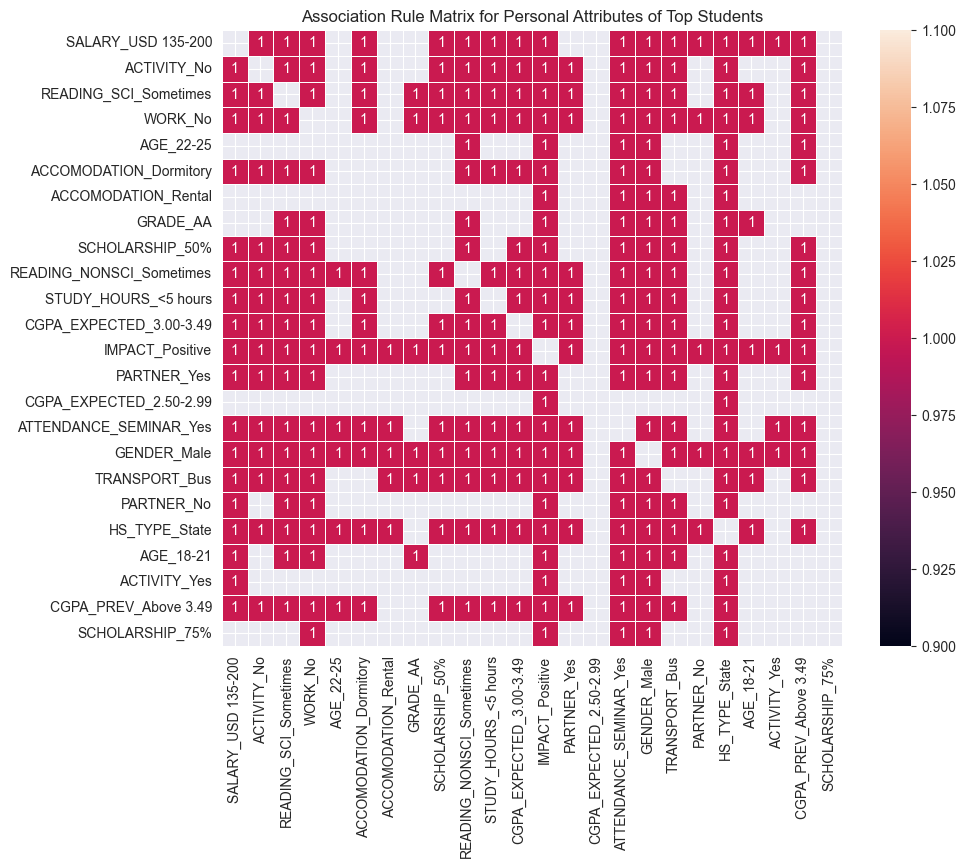

In [282]:
all_items = list(set(item for row in association_rules[['antecedents', 'consequents']].values.flatten() for item in row))

# Create a matrix with rows and columns representing items
association_matrix = pd.DataFrame(index=all_items, columns=all_items, dtype=int)

# Fill the matrix based on the presence of items in antecedents and consequents
for idx, row in association_rules.iterrows():
    association_matrix.loc[row['antecedents'], row['consequents']] = 1

plt.figure(figsize=(10, 8))
sns.heatmap(association_matrix, annot=True, linewidths=.5)
plt.title('Association Rule Matrix' + topic)
plt.show()

In [283]:
students_personal_result = association_rules[association_rules['antecedents'].astype(str).str.contains('CGPA_EXPECTED') | association_rules['consequents'].astype(str).str.contains('CGPA_EXPECTED')]
students_personal_result_sorted = students_personal_result.sort_values(by=['support', 'confidence'], ascending=False).reset_index(drop=True)
display(len(students_personal_result_sorted))
students_personal_result_sorted.head(20)

4514

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CGPA_EXPECTED_3.00-3.49),(IMPACT_Positive),0.550,1.00,0.550,1.000000,1.000000,0.0000,inf,0.000000
1,(IMPACT_Positive),(CGPA_EXPECTED_3.00-3.49),1.000,0.55,0.550,0.550000,1.000000,0.0000,1.000000,0.000000
2,"(GENDER_Male, CGPA_EXPECTED_3.00-3.49)",(IMPACT_Positive),0.500,1.00,0.500,1.000000,1.000000,0.0000,inf,0.000000
3,"(ATTENDANCE_SEMINAR_Yes, CGPA_EXPECTED_3.00-3.49)",(IMPACT_Positive),0.500,1.00,0.500,1.000000,1.000000,0.0000,inf,0.000000
4,(CGPA_EXPECTED_3.00-3.49),(GENDER_Male),0.550,0.85,0.500,0.909091,1.069519,0.0325,1.650000,0.144444
5,(CGPA_EXPECTED_3.00-3.49),(ATTENDANCE_SEMINAR_Yes),0.550,0.80,0.500,0.909091,1.136364,0.0600,2.200000,0.266667
6,"(IMPACT_Positive, CGPA_EXPECTED_3.00-3.49)",(GENDER_Male),0.550,0.85,0.500,0.909091,1.069519,0.0325,1.650000,0.144444
7,(CGPA_EXPECTED_3.00-3.49),"(GENDER_Male, IMPACT_Positive)",0.550,0.85,0.500,0.909091,1.069519,0.0325,1.650000,0.144444
8,"(IMPACT_Positive, CGPA_EXPECTED_3.00-3.49)",(ATTENDANCE_SEMINAR_Yes),0.550,0.80,0.500,0.909091,1.136364,0.0600,2.200000,0.266667
9,(CGPA_EXPECTED_3.00-3.49),"(ATTENDANCE_SEMINAR_Yes, IMPACT_Positive)",0.550,0.80,0.500,0.909091,1.136364,0.0600,2.200000,0.266667


antecedents_str
CGPA_EXPECTED_3.00-3.49                                             263
IMPACT_Positive, CGPA_EXPECTED_3.00-3.49                            131
GENDER_Male, CGPA_EXPECTED_3.00-3.49                                123
ATTENDANCE_SEMINAR_Yes, CGPA_EXPECTED_3.00-3.49                     105
READING_SCI_Sometimes, CGPA_EXPECTED_3.00-3.49                       87
READING_NONSCI_Sometimes, CGPA_EXPECTED_3.00-3.49                    83
HS_TYPE_State, CGPA_EXPECTED_3.00-3.49                               79
GENDER_Male, IMPACT_Positive, CGPA_EXPECTED_3.00-3.49                61
CGPA_PREV_Above 3.49, CGPA_EXPECTED_3.00-3.49                        61
ATTENDANCE_SEMINAR_Yes, IMPACT_Positive, CGPA_EXPECTED_3.00-3.49     52
Name: count, dtype: int64

consequents_str
CGPA_EXPECTED_3.00-3.49                            263
IMPACT_Positive                                    134
IMPACT_Positive, CGPA_EXPECTED_3.00-3.49           131
GENDER_Male                                        124
GENDER_Male, CGPA_EXPECTED_3.00-3.49               121
ATTENDANCE_SEMINAR_Yes                             106
ATTENDANCE_SEMINAR_Yes, CGPA_EXPECTED_3.00-3.49    101
READING_SCI_Sometimes                               88
READING_NONSCI_Sometimes                            84
HS_TYPE_State                                       82
Name: count, dtype: int64

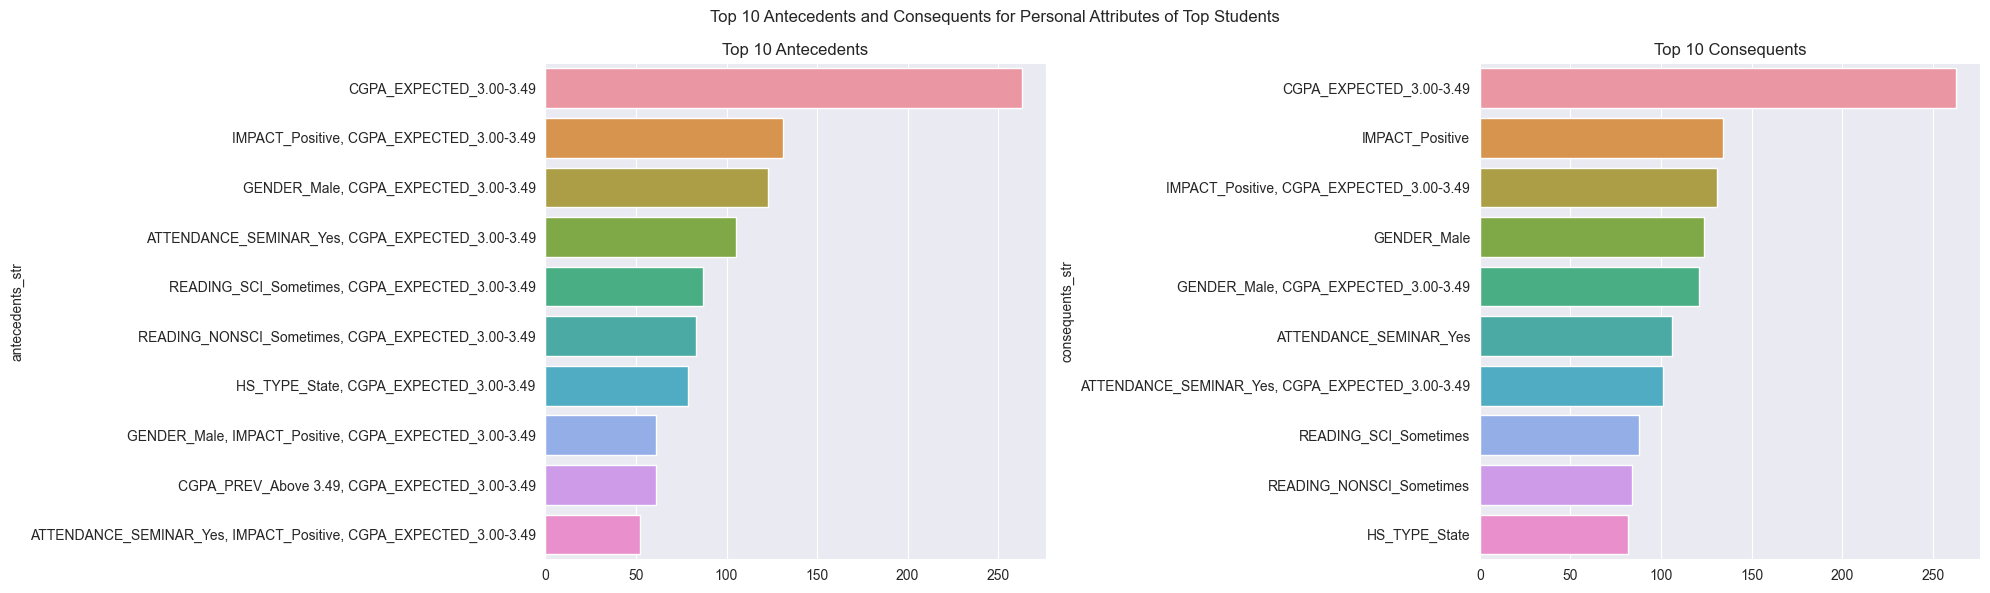

In [284]:
students_personal_result_sorted['antecedents_str'] = students_personal_result_sorted['antecedents'].apply(lambda x: ', '.join(map(str, x)))
students_personal_result_sorted['consequents_str'] = students_personal_result_sorted['consequents'].apply(lambda x: ', '.join(map(str, x)))

# Get the top 10 antecedents and consequents counts
top_antecedents_counts = students_personal_result_sorted['antecedents_str'].value_counts().head(10)
top_consequents_counts = students_personal_result_sorted['consequents_str'].value_counts().head(10)

# Plot bar charts for the top 10 antecedents and consequents using Seaborn
plt.figure(figsize=(20, 6))

# Top 10 Antecedents
plt.subplot(1, 2, 1)
sns.barplot(x=top_antecedents_counts.values, y=top_antecedents_counts.index)
plt.title('Top 10 Antecedents')

# Top 10 Consequents
plt.subplot(1, 2, 2)
sns.barplot(x=top_consequents_counts.values, y=top_consequents_counts.index)
plt.title('Top 10 Consequents')

plt.suptitle('Top 10 Antecedents and Consequents' + topic)

plt.tight_layout()

# Display the top 10 antecedents and consequents counts
display(top_antecedents_counts)
display(top_consequents_counts)

In [285]:
personal_top_check = ['HS_TYPE', 'READING_SCI', 'READING_NONSCI']

personal_top_check = association_rules[association_rules['antecedents'].astype(str).str.contains('|'.join(personal_top_check), na=False) | association_rules['consequents'].astype(str).str.contains('|'.join(personal_top_check), na=False)]
personal_top_check_result = personal_top_check[association_rules['antecedents'].astype(str).str.contains('CGPA_EXPECTED') | association_rules['consequents'].astype(str).str.contains('CGPA_EXPECTED')]
personal_top_check_result_sorted = personal_top_check_result.sort_values(by=['support', 'confidence'], ascending=False).reset_index(drop=True)
display(len(personal_top_check_result_sorted))
personal_top_check_result_sorted.head(20)

C:\Users\Anis\AppData\Local\Temp\ipykernel_24076\4096217436.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  personal_top_check_result = personal_top_check[association_rules['antecedents'].astype(str).str.contains('CGPA_EXPECTED') | association_rules['consequents'].astype(str).str.contains('CGPA_EXPECTED')]


3802

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(READING_SCI_Sometimes, CGPA_EXPECTED_3.00-3.49)",(GENDER_Male),0.45,0.850,0.45,1.000000,1.176471,0.06750,inf,0.272727
1,"(READING_NONSCI_Sometimes, CGPA_EXPECTED_3.00-...",(IMPACT_Positive),0.45,1.000,0.45,1.000000,1.000000,0.00000,inf,0.000000
2,"(READING_SCI_Sometimes, CGPA_EXPECTED_3.00-3.49)",(IMPACT_Positive),0.45,1.000,0.45,1.000000,1.000000,0.00000,inf,0.000000
3,"(READING_SCI_Sometimes, GENDER_Male, CGPA_EXPE...",(IMPACT_Positive),0.45,1.000,0.45,1.000000,1.000000,0.00000,inf,0.000000
4,"(READING_SCI_Sometimes, IMPACT_Positive, CGPA_...",(GENDER_Male),0.45,0.850,0.45,1.000000,1.176471,0.06750,inf,0.272727
5,"(READING_SCI_Sometimes, CGPA_EXPECTED_3.00-3.49)","(GENDER_Male, IMPACT_Positive)",0.45,0.850,0.45,1.000000,1.176471,0.06750,inf,0.272727
6,"(GENDER_Male, CGPA_EXPECTED_3.00-3.49)",(READING_SCI_Sometimes),0.50,0.750,0.45,0.900000,1.200000,0.07500,2.5000,0.333333
7,"(GENDER_Male, IMPACT_Positive, CGPA_EXPECTED_3...",(READING_SCI_Sometimes),0.50,0.750,0.45,0.900000,1.200000,0.07500,2.5000,0.333333
8,"(GENDER_Male, CGPA_EXPECTED_3.00-3.49)","(READING_SCI_Sometimes, IMPACT_Positive)",0.50,0.750,0.45,0.900000,1.200000,0.07500,2.5000,0.333333
9,(CGPA_EXPECTED_3.00-3.49),(READING_NONSCI_Sometimes),0.55,0.725,0.45,0.818182,1.128527,0.05125,1.5125,0.253086


In [286]:
personal_top_check = association_rules[association_rules['antecedents'].astype(str).str.contains('HS_TYPE') | association_rules['consequents'].astype(str).str.contains('HS_TYPE')]
personal_top_check_result = personal_top_check[association_rules['antecedents'].astype(str).str.contains('CGPA_EXPECTED') | association_rules['consequents'].astype(str).str.contains('CGPA_EXPECTED')]
personal_top_check_result_sorted = personal_top_check_result.sort_values(by=['support', 'confidence'], ascending=False).reset_index(drop=True)
display(len(personal_top_check_result_sorted))
personal_top_check_result_sorted.head(20)

C:\Users\Anis\AppData\Local\Temp\ipykernel_24076\1529727514.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  personal_top_check_result = personal_top_check[association_rules['antecedents'].astype(str).str.contains('CGPA_EXPECTED') | association_rules['consequents'].astype(str).str.contains('CGPA_EXPECTED')]


2015

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(HS_TYPE_State, CGPA_EXPECTED_3.00-3.49)",(GENDER_Male),0.425,0.850,0.425,1.000000,1.176471,0.06375,inf,0.260870
1,"(HS_TYPE_State, CGPA_EXPECTED_3.00-3.49)",(IMPACT_Positive),0.425,1.000,0.425,1.000000,1.000000,0.00000,inf,0.000000
2,"(HS_TYPE_State, GENDER_Male, CGPA_EXPECTED_3.0...",(IMPACT_Positive),0.425,1.000,0.425,1.000000,1.000000,0.00000,inf,0.000000
3,"(HS_TYPE_State, IMPACT_Positive, CGPA_EXPECTED...",(GENDER_Male),0.425,0.850,0.425,1.000000,1.176471,0.06375,inf,0.260870
4,"(HS_TYPE_State, CGPA_EXPECTED_3.00-3.49)","(GENDER_Male, IMPACT_Positive)",0.425,0.850,0.425,1.000000,1.176471,0.06375,inf,0.260870
5,"(GENDER_Male, CGPA_EXPECTED_3.00-3.49)",(HS_TYPE_State),0.500,0.800,0.425,0.850000,1.062500,0.02500,1.333333,0.117647
6,"(GENDER_Male, IMPACT_Positive, CGPA_EXPECTED_3...",(HS_TYPE_State),0.500,0.800,0.425,0.850000,1.062500,0.02500,1.333333,0.117647
7,"(GENDER_Male, CGPA_EXPECTED_3.00-3.49)","(HS_TYPE_State, IMPACT_Positive)",0.500,0.800,0.425,0.850000,1.062500,0.02500,1.333333,0.117647
8,(CGPA_EXPECTED_3.00-3.49),(HS_TYPE_State),0.550,0.800,0.425,0.772727,0.965909,-0.01500,0.880000,-0.072727
9,(CGPA_EXPECTED_3.00-3.49),"(HS_TYPE_State, GENDER_Male)",0.550,0.725,0.425,0.772727,1.065831,0.02625,1.210000,0.137255


In [287]:
# Filter rules with one item in antecedents and consequents
single_item_rules = association_rules[
    association_rules.apply(lambda row: len(row['antecedents']) == 1 and len(row['consequents']) == 1, axis=1)
]

single_item_rules = single_item_rules[single_item_rules['consequents'].astype(str).str.contains('CGPA_EXPECTED')]
single_item_rules_sorted = single_item_rules.sort_values(by=['support', 'confidence'], ascending=False).reset_index(drop=True)
display(len(single_item_rules_sorted))
single_item_rules_sorted.head(20)

15

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(IMPACT_Positive),(CGPA_EXPECTED_3.00-3.49),1.000,0.55,0.550,0.550000,1.000000,0.00000,1.000000,0.000000
1,(ATTENDANCE_SEMINAR_Yes),(CGPA_EXPECTED_3.00-3.49),0.800,0.55,0.500,0.625000,1.136364,0.06000,1.200000,0.600000
2,(GENDER_Male),(CGPA_EXPECTED_3.00-3.49),0.850,0.55,0.500,0.588235,1.069519,0.03250,1.092857,0.433333
3,(READING_NONSCI_Sometimes),(CGPA_EXPECTED_3.00-3.49),0.725,0.55,0.450,0.620690,1.128527,0.05125,1.186364,0.414141
4,(READING_SCI_Sometimes),(CGPA_EXPECTED_3.00-3.49),0.750,0.55,0.450,0.600000,1.090909,0.03750,1.125000,0.333333
5,(CGPA_PREV_Above 3.49),(CGPA_EXPECTED_3.00-3.49),0.625,0.55,0.425,0.680000,1.236364,0.08125,1.406250,0.509804
6,(HS_TYPE_State),(CGPA_EXPECTED_3.00-3.49),0.800,0.55,0.425,0.531250,0.965909,-0.01500,0.960000,-0.150000
7,(TRANSPORT_Bus),(CGPA_EXPECTED_3.00-3.49),0.675,0.55,0.400,0.592593,1.077441,0.02875,1.104545,0.221154
8,(SALARY_USD 135-200),(CGPA_EXPECTED_3.00-3.49),0.700,0.55,0.400,0.571429,1.038961,0.01500,1.050000,0.125000
9,(WORK_No),(CGPA_EXPECTED_3.00-3.49),0.750,0.55,0.375,0.500000,0.909091,-0.03750,0.900000,-0.285714


In [288]:
personal_top_single = single_item_rules_sorted.copy()

#### Failing students

In [289]:
students_personal = students_bot_all[list(set(personal + edu_extra + edu_info))]
students_personal = students_personal.drop(columns='STUDENT ID')
display(students_personal.shape)
students_personal

(21, 19)

,GRADE,GENDER,SCHOLARSHIP,STUDY_HOURS,SALARY,HS_TYPE,CGPA_PREV,TRANSPORT,AGE,WORK,ACCOMODATION,ATTENDANCE_SEMINAR,ACTIVITY,IMPACT,COURSE ID,PARTNER,READING_NONSCI,CGPA_EXPECTED,READING_SCI
0,DD,Male,50%,6-10 hours,USD 135-200,Other,<2.00,Bus,22-25,Yes,Rental,Yes,No,Positive,1,No,Sometimes,<2.00,Sometimes
1,DC,Female,50%,None,USD 201-270,State,<2.00,Private Car/Taxi,18-21,Yes,With family,Yes,Yes,Positive,1,Yes,Sometimes,<2.00,Sometimes
2,Fail,Female,50%,<5 hours,USD 271-340,State,<2.00,Other,22-25,No,Dormitory,Yes,No,Positive,1,Yes,Sometimes,2.00-2.49,Sometimes
3,DC,Female,50%,None,USD 271-340,Private,<2.00,Private Car/Taxi,18-21,No,With family,Yes,No,Positive,1,No,None,<2.00,None
4,CC,Male,50%,<5 hours,USD 135-200,State,<2.00,Bus,22-25,No,Dormitory,Yes,No,Positive,1,Yes,Sometimes,2.00-2.49,Sometimes
5,DD,Male,75%,<5 hours,USD 271-340,Private,<2.00,Bus,18-21,No,Rental,Yes,No,Positive,1,No,Sometimes,<2.00,Sometimes
6,AA,Male,25%,<5 hours,USD 201-270,Private,<2.00,Private Car/Taxi,18-21,No,Dormitory,No,No,Positive,4,Yes,Sometimes,<2.00,Sometimes
7,AA,Male,50%,None,USD 271-340,Other,<2.00,Bus,22-25,No,Rental,Yes,No,Positive,5,No,Sometimes,2.00-2.49,Sometimes
8,BA,Male,50%,<5 hours,USD 201-270,State,<2.00,Bus,22-25,No,Rental,Yes,Yes,Positive,6,No,Sometimes,<2.00,Sometimes
9,CC,Female,50%,<5 hours,USD 135-200,State,<2.00,Private Car/Taxi,18-21,No,Dormitory,Yes,No,Positive,7,No,Sometimes,<2.00,Sometimes


In [290]:
students_personal_encoded = pd.get_dummies(students_personal, columns=students_personal.columns)

In [291]:
fp_apriori = fp.apriori(students_personal_encoded,min_support=0.3,use_colnames=True)
display(fp_apriori)

,support,itemsets
0,0.380952,(GRADE_Fail)
1,0.714286,(GENDER_Female)
2,0.571429,(SCHOLARSHIP_50%)
3,0.571429,(STUDY_HOURS_<5 hours)
4,0.428571,(SALARY_USD 135-200)
...,...,...
333,0.333333,"(ACTIVITY_No, READING_SCI_Sometimes, READING_N..."
334,0.333333,"(READING_SCI_Sometimes, READING_NONSCI_Sometim..."
335,0.333333,"(ACTIVITY_No, READING_SCI_Sometimes, READING_N..."
336,0.333333,"(ACTIVITY_No, READING_SCI_Sometimes, READING_N..."


In [292]:
fp_fpgrowth = fp.fpgrowth(students_personal_encoded, min_support=0.3, use_colnames=True)
display(fp_fpgrowth)

,support,itemsets
0,0.809524,(CGPA_PREV_<2.00)
1,0.761905,(READING_NONSCI_Sometimes)
2,0.761905,(IMPACT_Positive)
3,0.619048,(READING_SCI_Sometimes)
4,0.571429,(ATTENDANCE_SEMINAR_Yes)
...,...,...
333,0.380952,"(GENDER_Female, GRADE_Fail)"
334,0.333333,"(ATTENDANCE_SEMINAR_No, STUDY_HOURS_<5 hours)"
335,0.333333,"(READING_NONSCI_Sometimes, ATTENDANCE_SEMINAR_No)"
336,0.333333,"(ATTENDANCE_SEMINAR_No, CGPA_PREV_<2.00)"


In [293]:
association_rules = fp.association_rules(fp_apriori,metric='confidence', min_threshold=0.5,support_only=False)
display(len(association_rules))

2054

In [294]:
students_personal_result_sorted = association_rules.sort_values(by=['support', 'confidence'], ascending=False).reset_index(drop=True)
display(students_personal_result_sorted)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(READING_NONSCI_Sometimes),(CGPA_PREV_<2.00),0.761905,0.809524,0.666667,0.875000,1.080882,0.049887,1.523810,0.314286
1,(CGPA_PREV_<2.00),(READING_NONSCI_Sometimes),0.809524,0.761905,0.666667,0.823529,1.080882,0.049887,1.349206,0.392857
2,(IMPACT_Positive),(CGPA_PREV_<2.00),0.761905,0.809524,0.619048,0.812500,1.003676,0.002268,1.015873,0.015385
3,(READING_NONSCI_Sometimes),(IMPACT_Positive),0.761905,0.761905,0.619048,0.812500,1.066406,0.038549,1.269841,0.261538
4,(IMPACT_Positive),(READING_NONSCI_Sometimes),0.761905,0.761905,0.619048,0.812500,1.066406,0.038549,1.269841,0.261538
...,...,...,...,...,...,...,...,...,...,...
2049,"(READING_NONSCI_Sometimes, CGPA_PREV_<2.00)","(WORK_No, IMPACT_Positive, STUDY_HOURS_<5 hours)",0.666667,0.380952,0.333333,0.500000,1.312500,0.079365,1.238095,0.714286
2050,"(READING_NONSCI_Sometimes, CGPA_PREV_<2.00)","(ACTIVITY_No, WORK_No, IMPACT_Positive)",0.666667,0.428571,0.333333,0.500000,1.166667,0.047619,1.142857,0.428571
2051,"(READING_NONSCI_Sometimes, CGPA_PREV_<2.00)","(READING_SCI_Sometimes, WORK_No, IMPACT_Positive)",0.666667,0.380952,0.333333,0.500000,1.312500,0.079365,1.238095,0.714286
2052,"(READING_NONSCI_Sometimes, CGPA_PREV_<2.00)","(ACTIVITY_No, READING_SCI_Sometimes, IMPACT_Po...",0.666667,0.428571,0.333333,0.500000,1.166667,0.047619,1.142857,0.428571


In [295]:
topic =' for Personal Attributes of Failing Students'

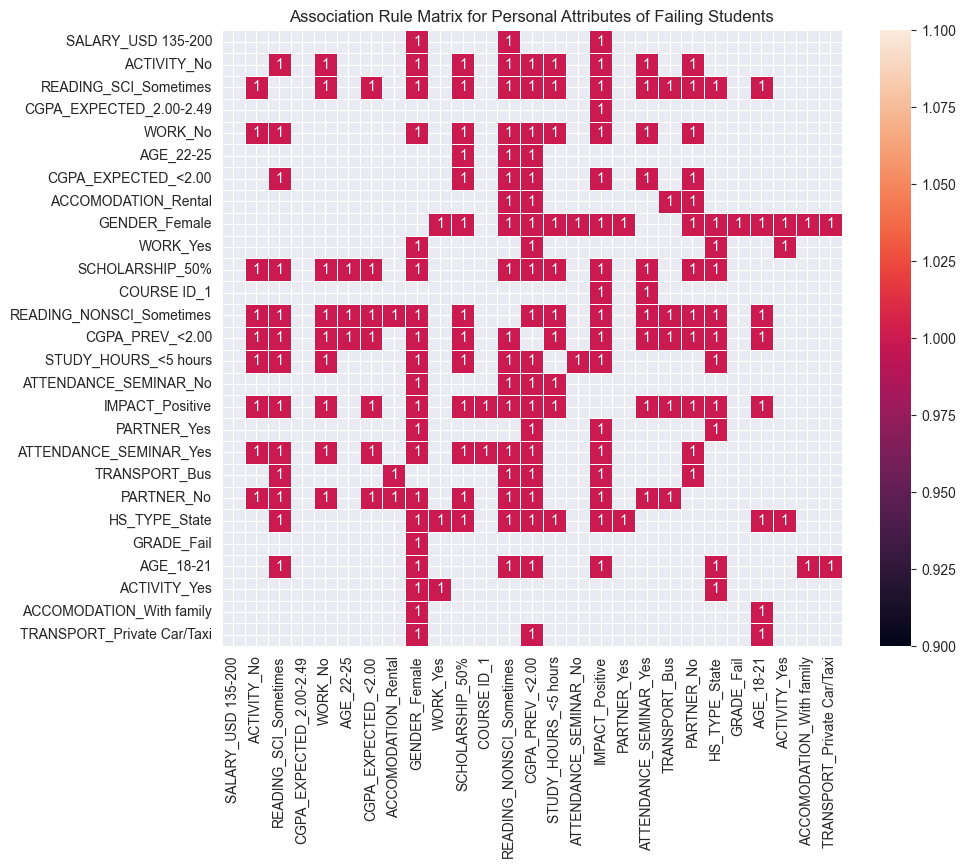

In [296]:
all_items = list(set(item for row in association_rules[['antecedents', 'consequents']].values.flatten() for item in row))

# Create a matrix with rows and columns representing items
association_matrix = pd.DataFrame(index=all_items, columns=all_items, dtype=int)

# Fill the matrix based on the presence of items in antecedents and consequents
for idx, row in association_rules.iterrows():
    association_matrix.loc[row['antecedents'], row['consequents']] = 1

plt.figure(figsize=(10, 8))
sns.heatmap(association_matrix, annot=True, linewidths=.5)
plt.title('Association Rule Matrix' + topic)
plt.show()

In [297]:
students_personal_result = association_rules[association_rules['antecedents'].astype(str).str.contains('CGPA_EXPECTED') | association_rules['consequents'].astype(str).str.contains('CGPA_EXPECTED')]
students_personal_result_sorted = students_personal_result.sort_values(by=['support', 'confidence'], ascending=False).reset_index(drop=True)
display(len(students_personal_result_sorted))
students_personal_result_sorted.head(20)

77

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CGPA_EXPECTED_<2.00),(CGPA_PREV_<2.00),0.476190,0.809524,0.476190,1.000000,1.235294,0.090703,inf,0.363636
1,(CGPA_PREV_<2.00),(CGPA_EXPECTED_<2.00),0.809524,0.476190,0.476190,0.588235,1.235294,0.090703,1.272109,1.000000
2,"(CGPA_EXPECTED_<2.00, IMPACT_Positive)",(CGPA_PREV_<2.00),0.380952,0.809524,0.380952,1.000000,1.235294,0.072562,inf,0.307692
3,"(READING_NONSCI_Sometimes, CGPA_EXPECTED_<2.00)",(CGPA_PREV_<2.00),0.380952,0.809524,0.380952,1.000000,1.235294,0.072562,inf,0.307692
4,(CGPA_EXPECTED_<2.00),(IMPACT_Positive),0.476190,0.761905,0.380952,0.800000,1.050000,0.018141,1.190476,0.090909
5,(CGPA_EXPECTED_<2.00),(READING_NONSCI_Sometimes),0.476190,0.761905,0.380952,0.800000,1.050000,0.018141,1.190476,0.090909
6,"(CGPA_EXPECTED_<2.00, CGPA_PREV_<2.00)",(IMPACT_Positive),0.476190,0.761905,0.380952,0.800000,1.050000,0.018141,1.190476,0.090909
7,(CGPA_EXPECTED_<2.00),"(IMPACT_Positive, CGPA_PREV_<2.00)",0.476190,0.619048,0.380952,0.800000,1.292308,0.086168,1.904762,0.431818
8,"(CGPA_EXPECTED_<2.00, CGPA_PREV_<2.00)",(READING_NONSCI_Sometimes),0.476190,0.761905,0.380952,0.800000,1.050000,0.018141,1.190476,0.090909
9,(CGPA_EXPECTED_<2.00),"(READING_NONSCI_Sometimes, CGPA_PREV_<2.00)",0.476190,0.666667,0.380952,0.800000,1.200000,0.063492,1.666667,0.318182


antecedents_str
CGPA_EXPECTED_<2.00                                               17
CGPA_EXPECTED_<2.00, CGPA_PREV_<2.00                               8
READING_NONSCI_Sometimes, CGPA_EXPECTED_<2.00                      5
READING_SCI_Sometimes                                              4
CGPA_EXPECTED_<2.00, IMPACT_Positive                               3
READING_NONSCI_Sometimes, CGPA_PREV_<2.00                          3
READING_SCI_Sometimes, CGPA_EXPECTED_<2.00                         3
READING_NONSCI_Sometimes, CGPA_EXPECTED_<2.00, CGPA_PREV_<2.00     2
READING_NONSCI_Sometimes, READING_SCI_Sometimes                    2
PARTNER_No                                                         2
Name: count, dtype: int64

consequents_str
CGPA_EXPECTED_<2.00                                17
CGPA_PREV_<2.00                                     9
CGPA_EXPECTED_<2.00, CGPA_PREV_<2.00                8
READING_NONSCI_Sometimes                            6
IMPACT_Positive                                     5
READING_SCI_Sometimes                               4
READING_NONSCI_Sometimes, CGPA_EXPECTED_<2.00       3
READING_NONSCI_Sometimes, CGPA_PREV_<2.00           3
READING_NONSCI_Sometimes, READING_SCI_Sometimes     2
READING_NONSCI_Sometimes, IMPACT_Positive           2
Name: count, dtype: int64

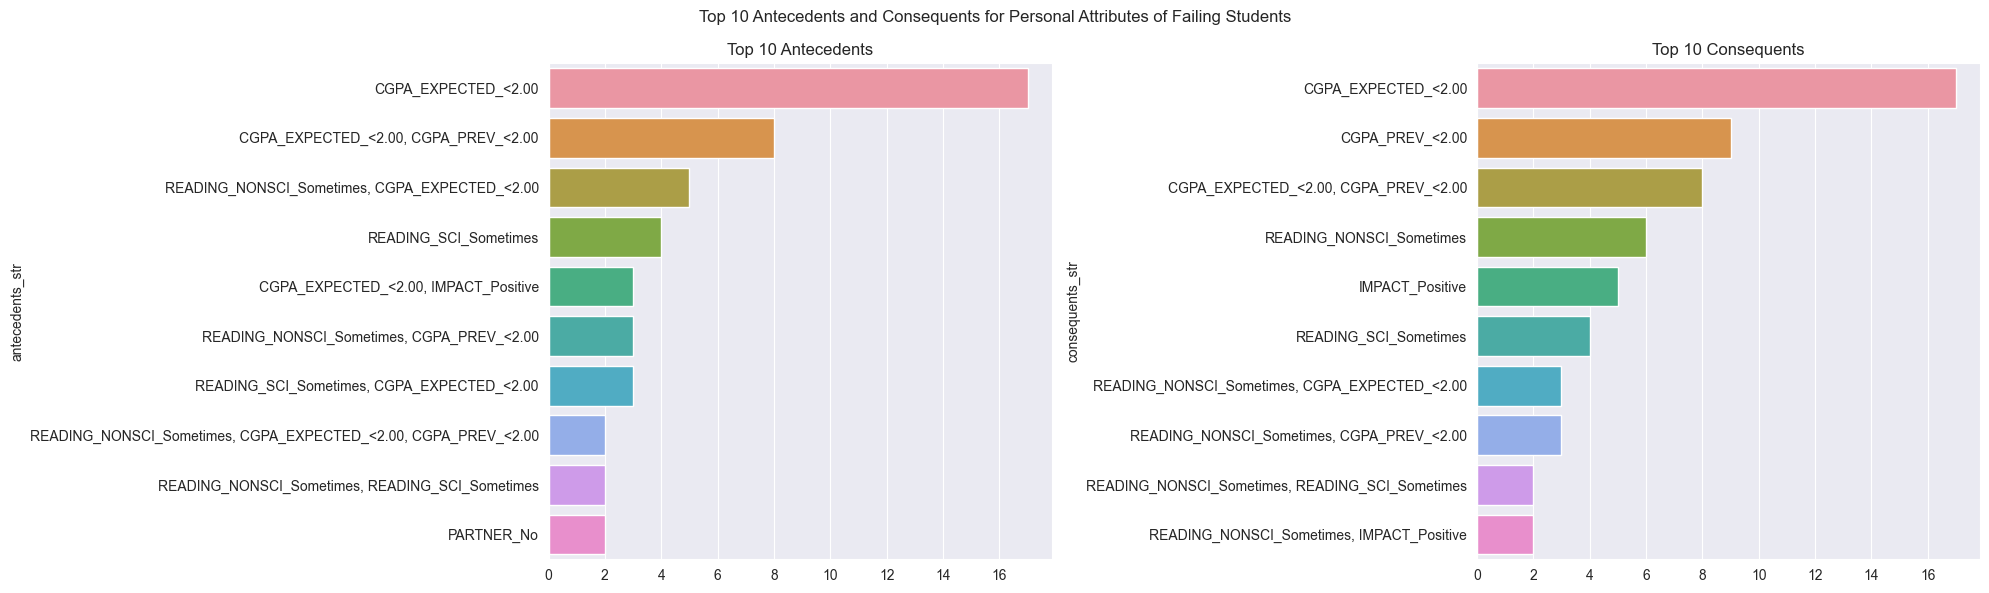

In [298]:
students_personal_result_sorted['antecedents_str'] = students_personal_result_sorted['antecedents'].apply(lambda x: ', '.join(map(str, x)))
students_personal_result_sorted['consequents_str'] = students_personal_result_sorted['consequents'].apply(lambda x: ', '.join(map(str, x)))

# Get the top 10 antecedents and consequents counts
top_antecedents_counts = students_personal_result_sorted['antecedents_str'].value_counts().head(10)
top_consequents_counts = students_personal_result_sorted['consequents_str'].value_counts().head(10)

# Plot bar charts for the top 10 antecedents and consequents using Seaborn
plt.figure(figsize=(20, 6))

# Top 10 Antecedents
plt.subplot(1, 2, 1)
sns.barplot(x=top_antecedents_counts.values, y=top_antecedents_counts.index)
plt.title('Top 10 Antecedents')

# Top 10 Consequents
plt.subplot(1, 2, 2)
sns.barplot(x=top_consequents_counts.values, y=top_consequents_counts.index)
plt.title('Top 10 Consequents')

plt.suptitle('Top 10 Antecedents and Consequents' + topic)

plt.tight_layout()

# Display the top 10 antecedents and consequents counts
display(top_antecedents_counts)
display(top_consequents_counts)

In [299]:
# Filter rules with one item in antecedents and consequents
single_item_rules = association_rules[
    association_rules.apply(lambda row: len(row['antecedents']) == 1 and len(row['consequents']) == 1, axis=1)
]

single_item_rules = single_item_rules[single_item_rules['consequents'].astype(str).str.contains('CGPA_EXPECTED')]
single_item_rules_sorted = single_item_rules.sort_values(by=['support', 'confidence'], ascending=False).reset_index(drop=True)
display(len(single_item_rules_sorted))
single_item_rules_sorted.head(20)

7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CGPA_PREV_<2.00),(CGPA_EXPECTED_<2.00),0.809524,0.47619,0.476190,0.588235,1.235294,0.090703,1.272109,1.000000
1,(IMPACT_Positive),(CGPA_EXPECTED_<2.00),0.761905,0.47619,0.380952,0.500000,1.050000,0.018141,1.047619,0.200000
2,(READING_NONSCI_Sometimes),(CGPA_EXPECTED_<2.00),0.761905,0.47619,0.380952,0.500000,1.050000,0.018141,1.047619,0.200000
3,(SCHOLARSHIP_50%),(CGPA_EXPECTED_<2.00),0.571429,0.47619,0.333333,0.583333,1.225000,0.061224,1.257143,0.428571
4,(ATTENDANCE_SEMINAR_Yes),(CGPA_EXPECTED_<2.00),0.571429,0.47619,0.333333,0.583333,1.225000,0.061224,1.257143,0.428571
5,(PARTNER_No),(CGPA_EXPECTED_<2.00),0.571429,0.47619,0.333333,0.583333,1.225000,0.061224,1.257143,0.428571
6,(READING_SCI_Sometimes),(CGPA_EXPECTED_<2.00),0.619048,0.47619,0.333333,0.538462,1.130769,0.038549,1.134921,0.303571


In [300]:
personal_bot_single = single_item_rules_sorted.copy()

##### Comparision

In [301]:
personal_top_single
personal_bot_single

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CGPA_PREV_<2.00),(CGPA_EXPECTED_<2.00),0.809524,0.47619,0.476190,0.588235,1.235294,0.090703,1.272109,1.000000
1,(IMPACT_Positive),(CGPA_EXPECTED_<2.00),0.761905,0.47619,0.380952,0.500000,1.050000,0.018141,1.047619,0.200000
2,(READING_NONSCI_Sometimes),(CGPA_EXPECTED_<2.00),0.761905,0.47619,0.380952,0.500000,1.050000,0.018141,1.047619,0.200000
3,(SCHOLARSHIP_50%),(CGPA_EXPECTED_<2.00),0.571429,0.47619,0.333333,0.583333,1.225000,0.061224,1.257143,0.428571
4,(ATTENDANCE_SEMINAR_Yes),(CGPA_EXPECTED_<2.00),0.571429,0.47619,0.333333,0.583333,1.225000,0.061224,1.257143,0.428571
5,(PARTNER_No),(CGPA_EXPECTED_<2.00),0.571429,0.47619,0.333333,0.583333,1.225000,0.061224,1.257143,0.428571
6,(READING_SCI_Sometimes),(CGPA_EXPECTED_<2.00),0.619048,0.47619,0.333333,0.538462,1.130769,0.038549,1.134921,0.303571


In [302]:
top_antecedents_set = set(item for sublist in personal_top_single['antecedents'] for item in sublist)
bot_antecedents_set = set(item for sublist in personal_bot_single['antecedents'] for item in sublist)

# Find the intersection of antecedents
intersection_antecedents = top_antecedents_set.intersection(bot_antecedents_set)

filtered_top_single = personal_top_single[personal_top_single['antecedents'].apply(lambda x: any(item in intersection_antecedents for item in x))]
filtered_bot_single = personal_bot_single[personal_bot_single['antecedents'].apply(lambda x: any(item in intersection_antecedents for item in x))]

display(filtered_top_single)
display(filtered_bot_single)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(IMPACT_Positive),(CGPA_EXPECTED_3.00-3.49),1.000,0.55,0.550,0.550000,1.000000,0.00000,1.000000,0.000000
1,(ATTENDANCE_SEMINAR_Yes),(CGPA_EXPECTED_3.00-3.49),0.800,0.55,0.500,0.625000,1.136364,0.06000,1.200000,0.600000
3,(READING_NONSCI_Sometimes),(CGPA_EXPECTED_3.00-3.49),0.725,0.55,0.450,0.620690,1.128527,0.05125,1.186364,0.414141
4,(READING_SCI_Sometimes),(CGPA_EXPECTED_3.00-3.49),0.750,0.55,0.450,0.600000,1.090909,0.03750,1.125000,0.333333
12,(SCHOLARSHIP_50%),(CGPA_EXPECTED_3.00-3.49),0.450,0.55,0.325,0.722222,1.313131,0.07750,1.620000,0.433566


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(IMPACT_Positive),(CGPA_EXPECTED_<2.00),0.761905,0.47619,0.380952,0.500000,1.050000,0.018141,1.047619,0.200000
2,(READING_NONSCI_Sometimes),(CGPA_EXPECTED_<2.00),0.761905,0.47619,0.380952,0.500000,1.050000,0.018141,1.047619,0.200000
3,(SCHOLARSHIP_50%),(CGPA_EXPECTED_<2.00),0.571429,0.47619,0.333333,0.583333,1.225000,0.061224,1.257143,0.428571
4,(ATTENDANCE_SEMINAR_Yes),(CGPA_EXPECTED_<2.00),0.571429,0.47619,0.333333,0.583333,1.225000,0.061224,1.257143,0.428571
6,(READING_SCI_Sometimes),(CGPA_EXPECTED_<2.00),0.619048,0.47619,0.333333,0.538462,1.130769,0.038549,1.134921,0.303571
